# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

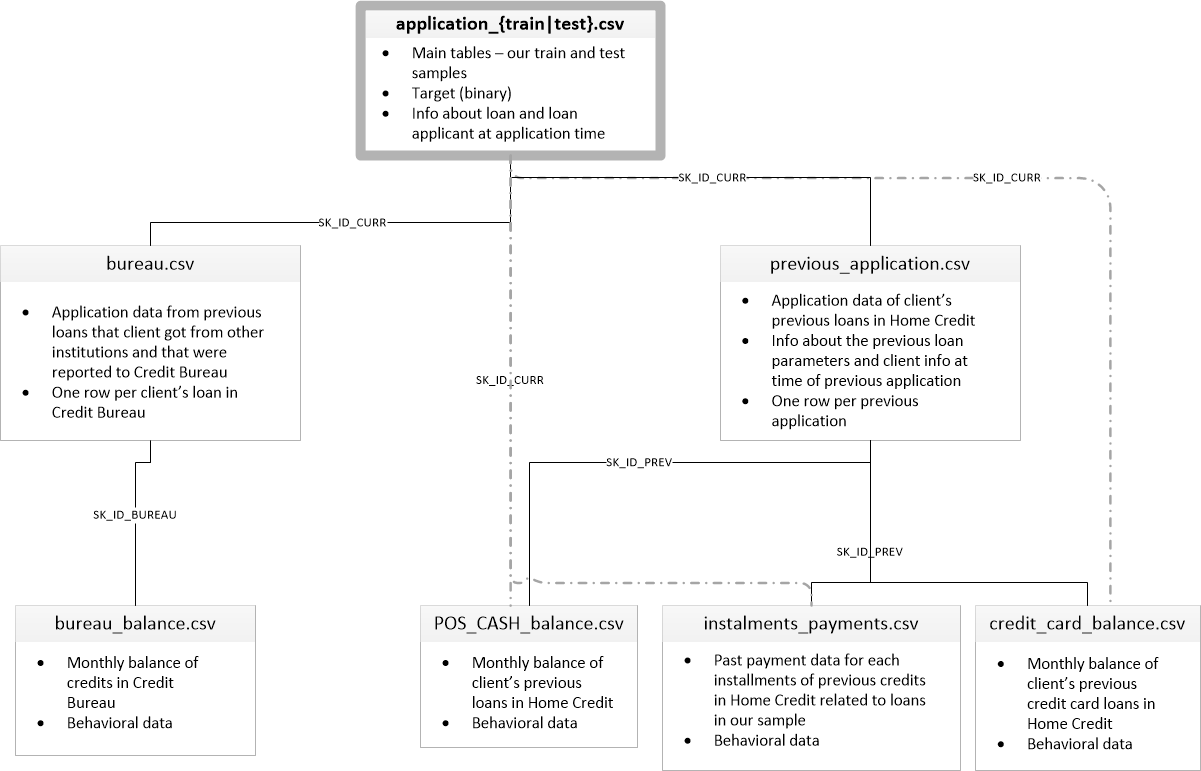

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [1]:
DATA_DIR = "../input/home-credit-default-risk"  #same level as course repo in the data directory

In [2]:
!ls -l $DATA_DIR

total 2621364
-rw-r--r-- 1 nobody nogroup     37383 Dec  4  2020 HomeCredit_columns_description.csv
-rw-r--r-- 1 nobody nogroup 392703158 Dec  4  2020 POS_CASH_balance.csv
-rw-r--r-- 1 nobody nogroup  26567651 Dec  4  2020 application_test.csv
-rw-r--r-- 1 nobody nogroup 166133370 Dec  4  2020 application_train.csv
-rw-r--r-- 1 nobody nogroup 170016717 Dec  4  2020 bureau.csv
-rw-r--r-- 1 nobody nogroup 375592889 Dec  4  2020 bureau_balance.csv
-rw-r--r-- 1 nobody nogroup 424582605 Dec  4  2020 credit_card_balance.csv
-rw-r--r-- 1 nobody nogroup 723118349 Dec  4  2020 installments_payments.csv
-rw-r--r-- 1 nobody nogroup 404973293 Dec  4  2020 previous_application.csv
-rw-r--r-- 1 nobody nogroup    536202 Dec  4  2020 sample_submission.csv


### Imports

In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

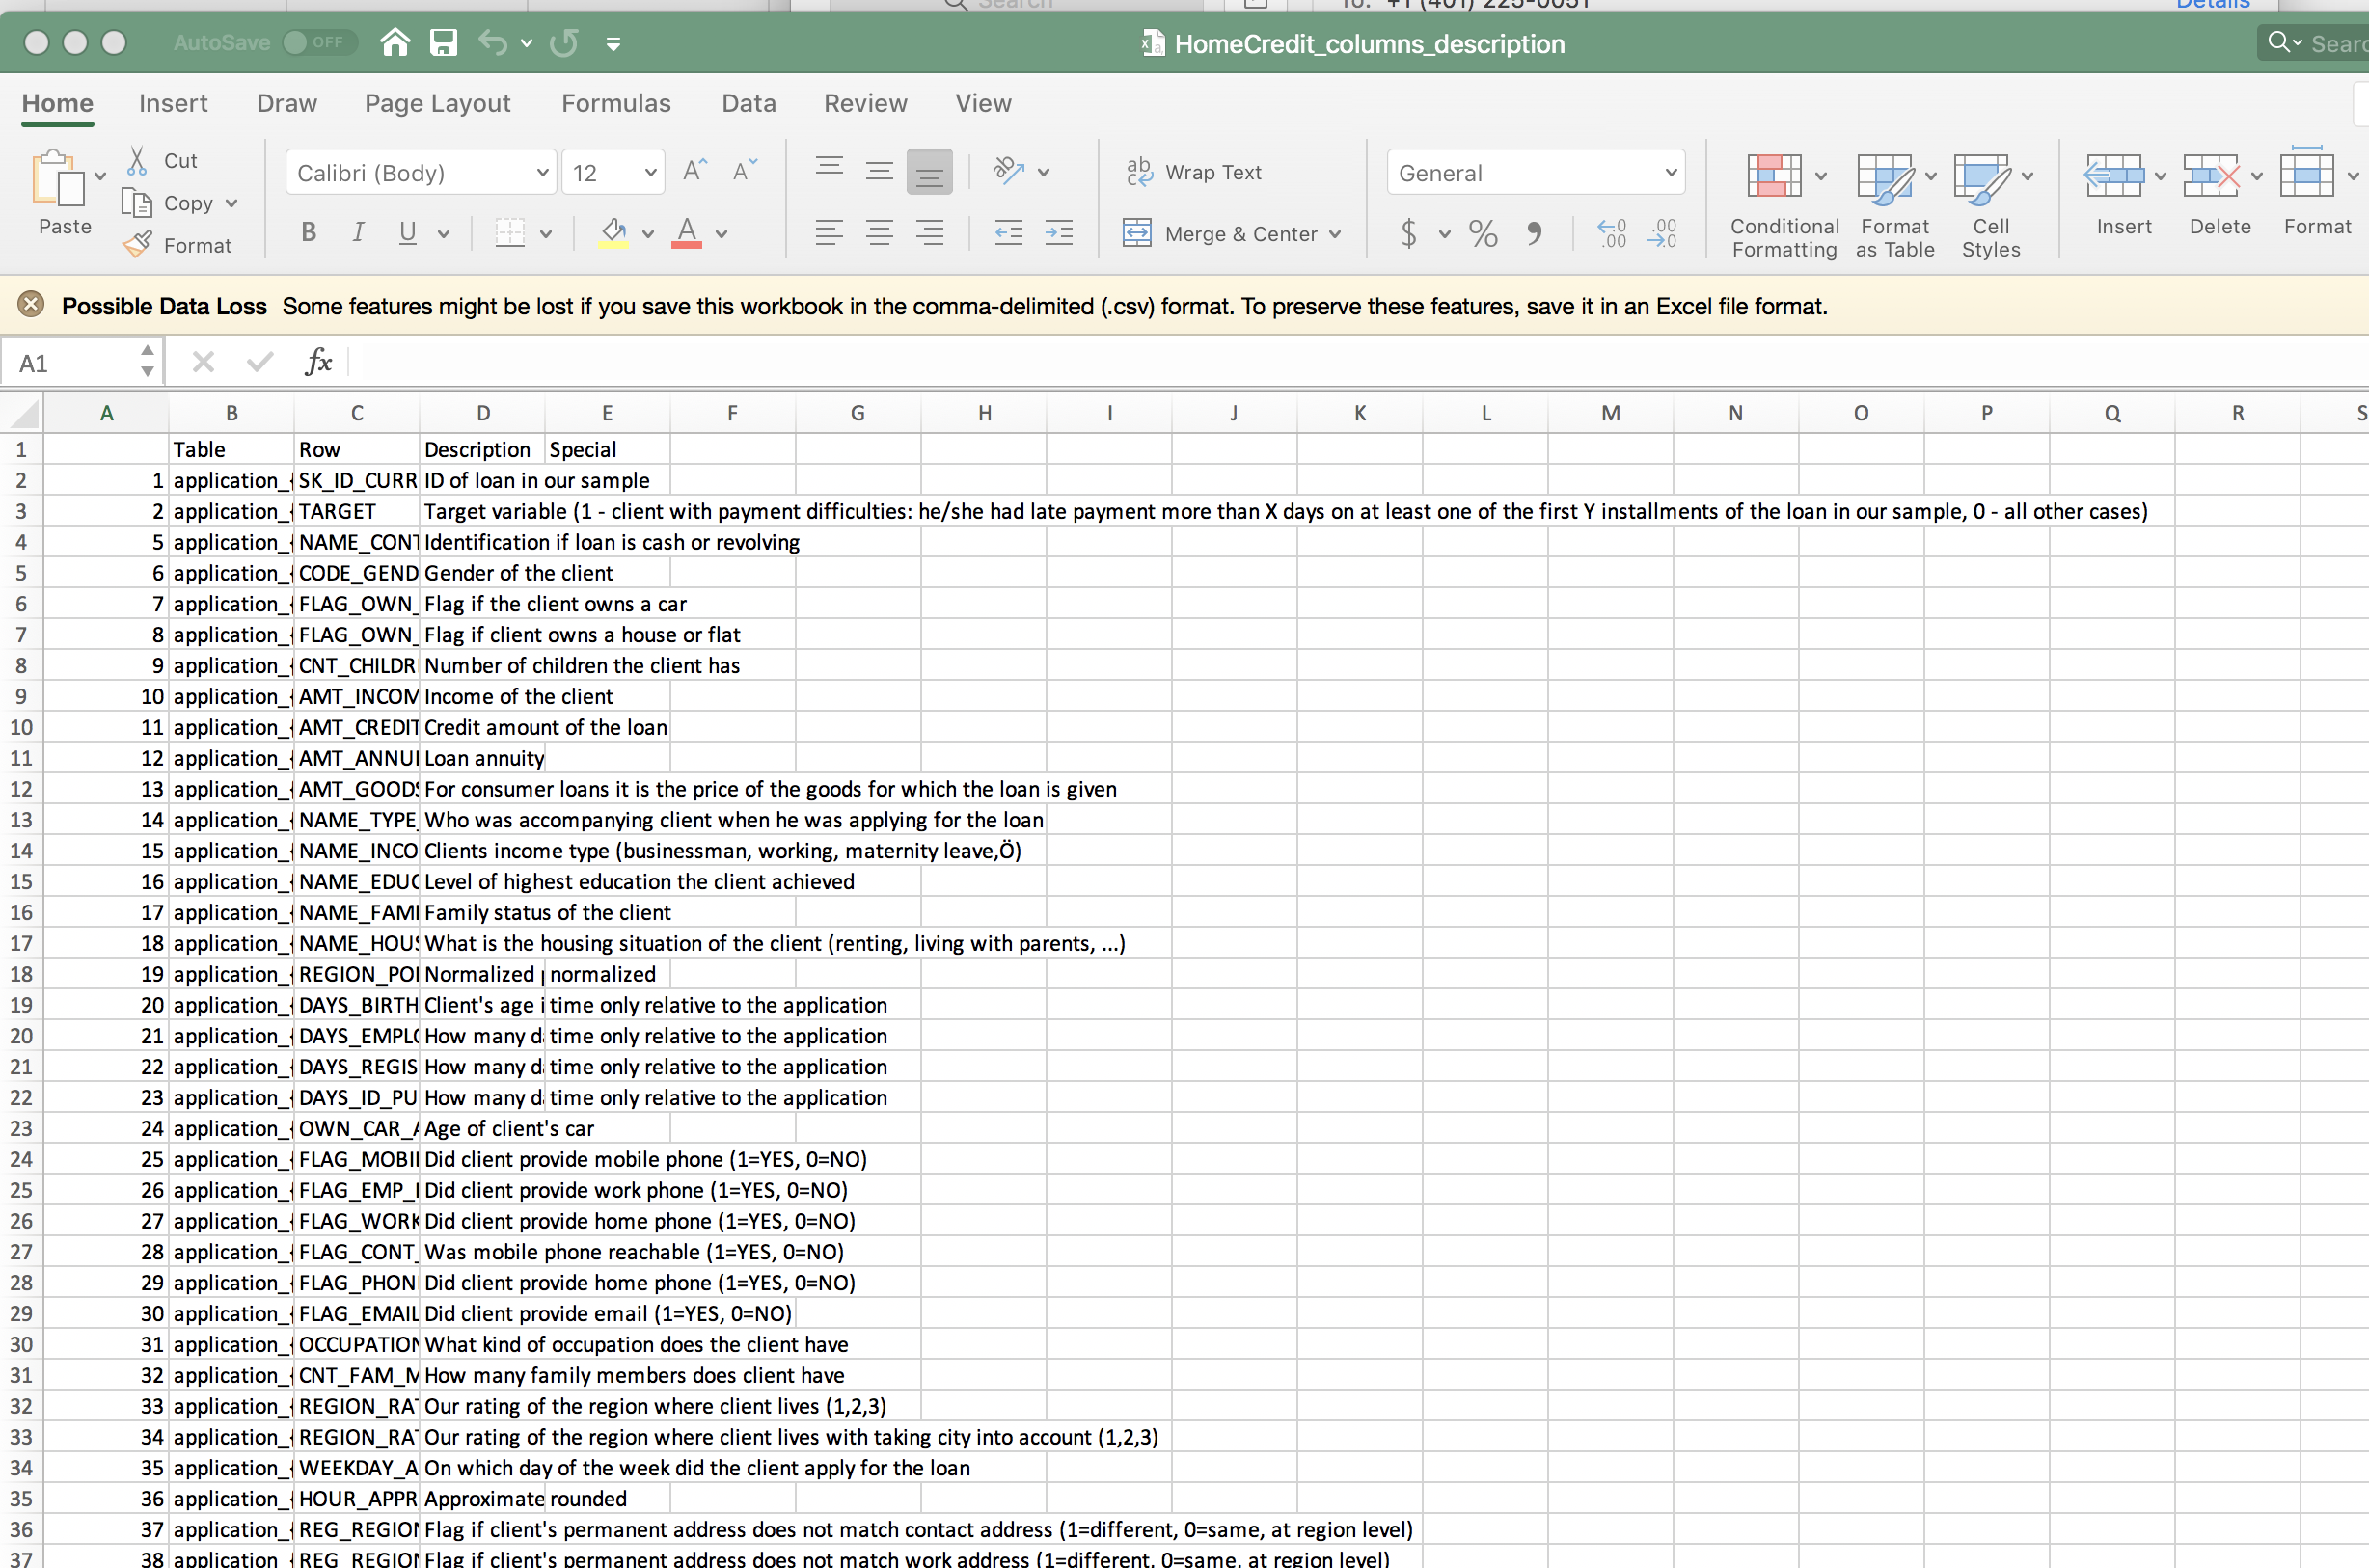

### Application train

In [5]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [6]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [7]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 52.5 s, sys: 5.13 s, total: 57.6 s
Wall time: 1min 14s


In [8]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application train

In [10]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
datasets["application_train"].describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
datasets["application_test"].describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


## Missing data count for application train and test

In [19]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


In [20]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


## Distribution of the target column 

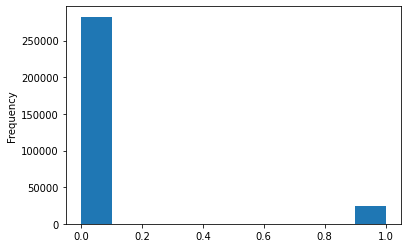

In [21]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

## Top Correlation with  the target column 

In [22]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(40))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

## Applicants Age distribution

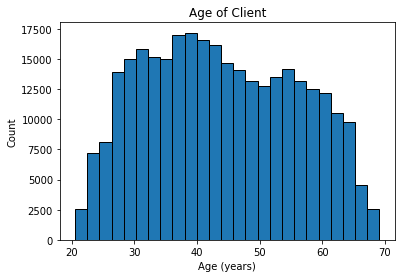

In [23]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

## Applicants occupations

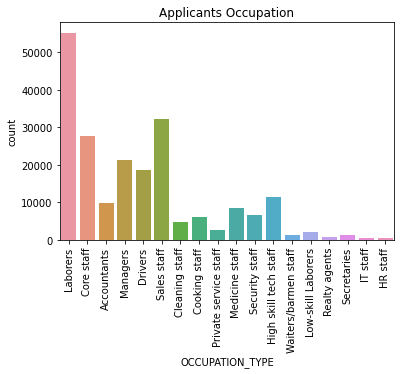

In [24]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"], orient='h');
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

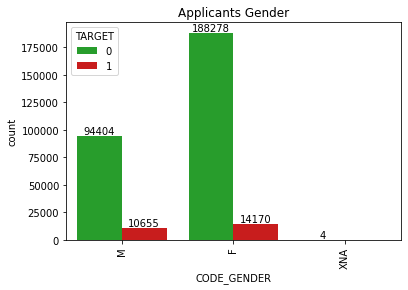

In [25]:

ax = sns.countplot(x='CODE_GENDER', data=datasets["application_train"], hue = 'TARGET',
                   palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]]);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Applicants Gender');
plt.xticks(rotation=90);

According to applicant data, women have nearly double the number of loan applications than males has. Approximately 202,448 loan applications have been submitted overall by women, compared to 105,059 by men. However, compared to female applicants (approximately 7%), a higher proportion of men (about 10% of the total) had issues repaying the loan or making installments on time.

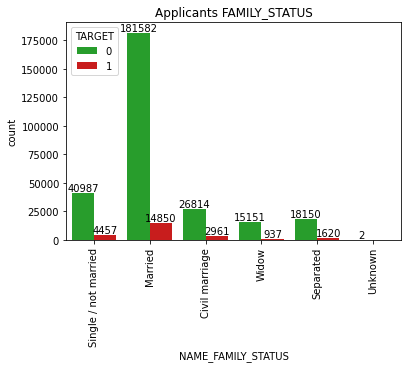

In [26]:
ax = sns.countplot(x='NAME_FAMILY_STATUS', data=datasets["application_train"], hue = 'TARGET',
                   palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]]);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Applicants FAMILY_STATUS');
plt.xticks(rotation=90);

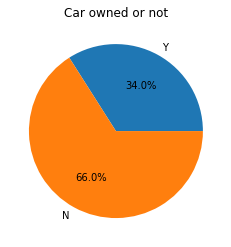

In [27]:
# datasets["application_train"].groupby(['FLAG_OWN_CAR'])['FLAG_OWN_CAR'].count().sort_values(ascending=True)
plt.pie(datasets["application_train"].groupby(['FLAG_OWN_CAR'])['FLAG_OWN_CAR'].count().sort_values(ascending=True), labels=['Y', 'N'], autopct='%1.1f%%')
plt.title('Car owned or not')
plt.show()

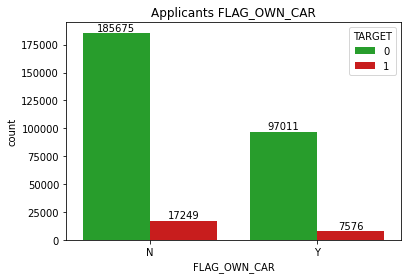

In [28]:
ax = sns.countplot(x='FLAG_OWN_CAR', data=datasets["application_train"], hue = 'TARGET',
                   palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]]);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Applicants FLAG_OWN_CAR');
plt.xticks(rotation=0);

Only '34%' of applicants own Car who had applied for the loan in the past years.
However, a higher percentage of people having payment difficulties was observed with applicants which did not owned Car.

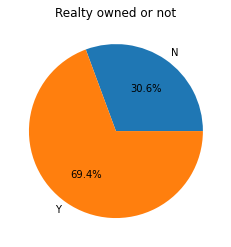

In [29]:
plt.pie(datasets["application_train"].groupby(['FLAG_OWN_REALTY'])['FLAG_OWN_REALTY'].count().sort_values(ascending=True),
        labels=['N', 'Y'], autopct='%1.1f%%')
plt.title('Realty owned or not')
plt.show()

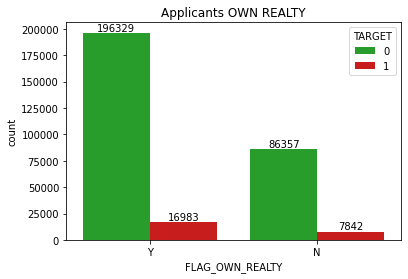

In [30]:
ax = sns.countplot(x='FLAG_OWN_REALTY', data=datasets["application_train"], hue = 'TARGET',
                   palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]]);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Applicants OWN REALTY');
plt.xticks(rotation=0);

Only '70%' of applicants own Realty who had applied for the loan in the past years. However, a higher percentage of people having payment difficulties was observed with applicants which did not owned Realty.

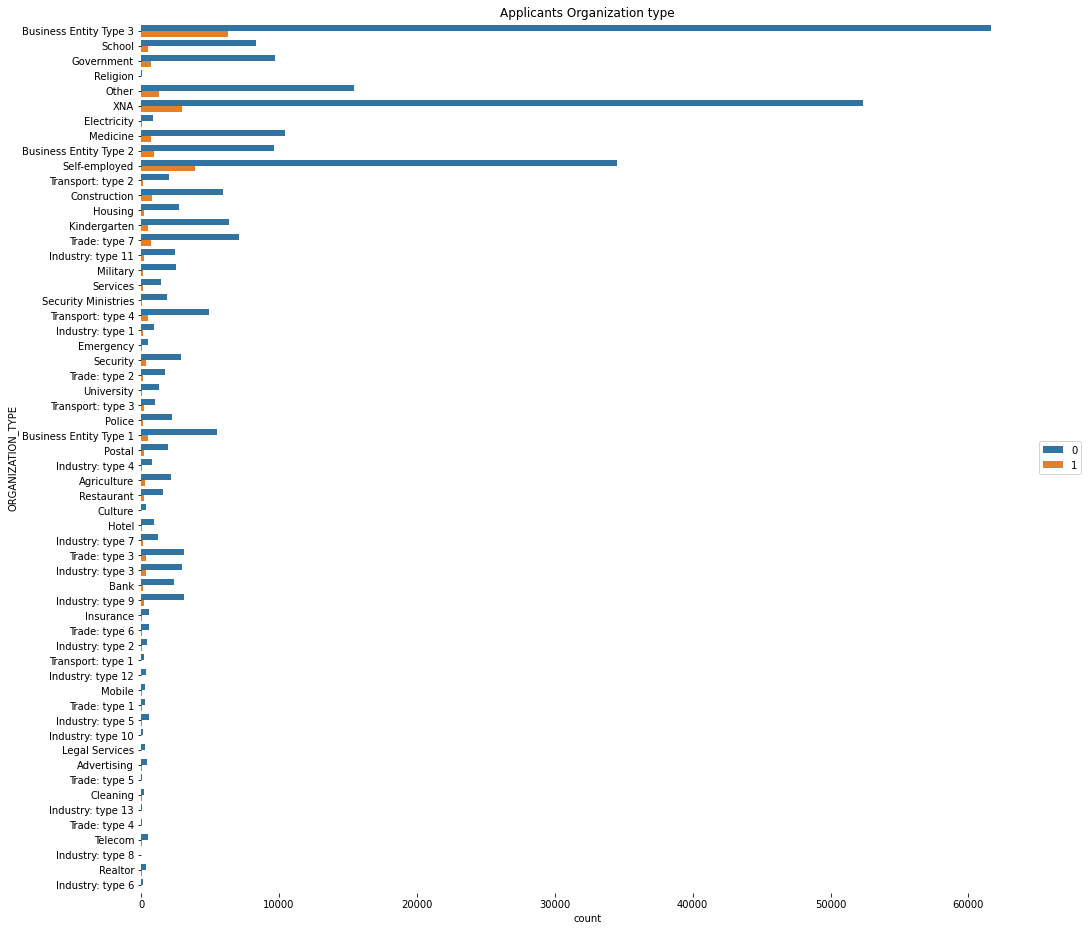

In [31]:
plt.figure(figsize=(16, 16))
ax = sns.countplot(y='ORGANIZATION_TYPE', data=datasets["application_train"], hue = 'TARGET', dodge=True, orient = 'h');
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
sns.despine(left=True, bottom=True)
ax.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.title('Applicants Organization type');
# plt.xticks(rotation=90);
plt.show()

<Figure size 1152x1152 with 0 Axes>

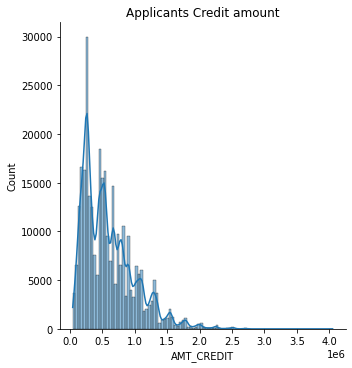

In [32]:
plt.figure(figsize=(16, 16))
sns.displot(x=datasets["application_train"]['AMT_CREDIT'], bins=100, kde=True)
# sns.lineplot(x=datasets["application_train"]['AMT_CREDIT'], y=datasets["application_train"]['TARGET'])
plt.title('Applicants Credit amount');

<Figure size 1152x1152 with 0 Axes>

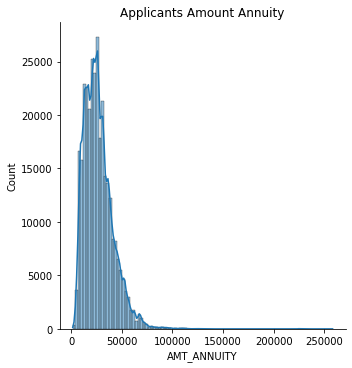

In [33]:
plt.figure(figsize=(16, 16))
sns.displot(x=datasets["application_train"]['AMT_ANNUITY'], bins=100, kde=True)
# sns.lineplot(x=datasets["application_train"]['AMT_CREDIT'], y=datasets["application_train"]['TARGET'])
plt.title('Applicants Amount Annuity');

<Figure size 1152x1152 with 0 Axes>

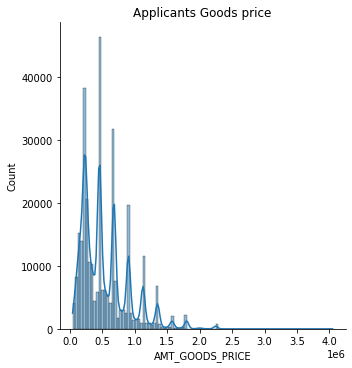

In [34]:
plt.figure(figsize=(16, 16))
sns.displot(x=datasets["application_train"]['AMT_GOODS_PRICE'], bins=100, kde=True)
# sns.lineplot(x=datasets["application_train"]['AMT_CREDIT'], y=datasets["application_train"]['TARGET'])
plt.title('Applicants Goods price');

<Figure size 1152x1152 with 0 Axes>

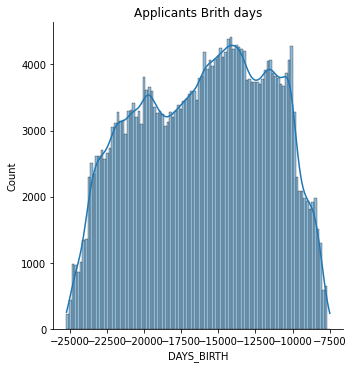

In [35]:
plt.figure(figsize=(16, 16))
sns.displot(x=datasets["application_train"]['DAYS_BIRTH'], bins=100, kde=True)
# sns.lineplot(x=datasets["application_train"]['AMT_CREDIT'], y=datasets["application_train"]['TARGET'])
plt.title('Applicants Brith days');

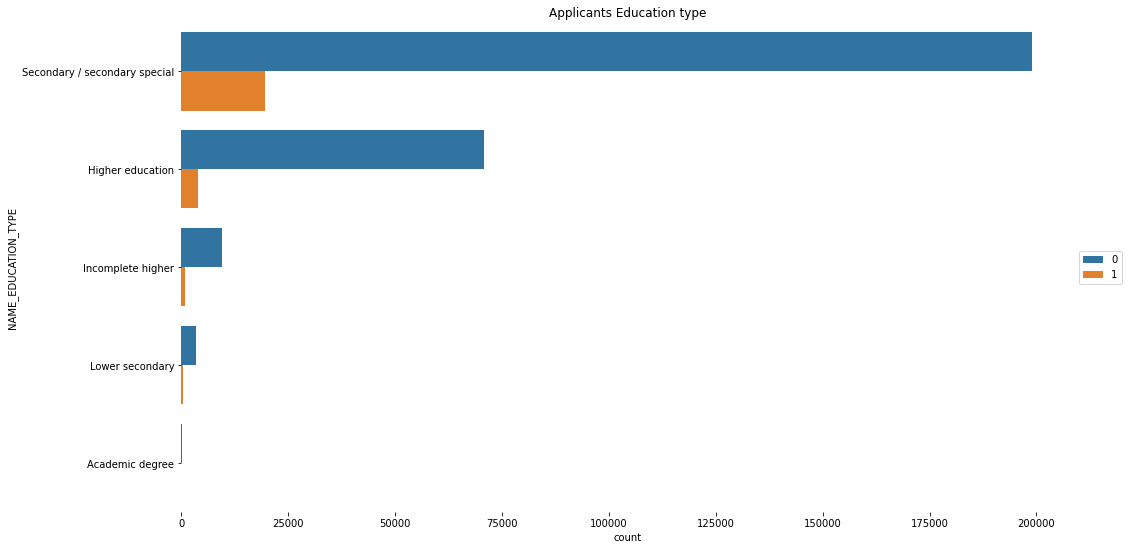

In [36]:
plt.figure(figsize=(16, 9))
ax = sns.countplot(y='NAME_EDUCATION_TYPE', data=datasets["application_train"], hue = 'TARGET', dodge=True, orient = 'h');
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
sns.despine(left=True, bottom=True)
ax.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.title('Applicants Education type');
# plt.xticks(rotation=90);
plt.show()

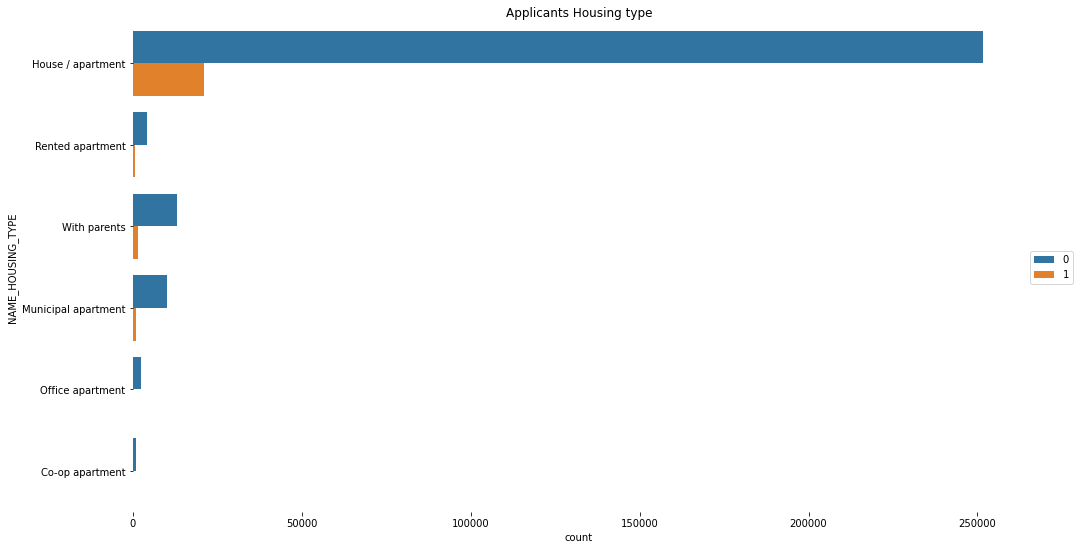

In [37]:
plt.figure(figsize=(16, 9))
ax = sns.countplot(y='NAME_HOUSING_TYPE', data=datasets["application_train"], hue = 'TARGET', dodge=True, orient = 'h');
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
sns.despine(left=True, bottom=True)
ax.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.title('Applicants Housing type');
# plt.xticks(rotation=90);
plt.show()

# Dataset questions

In [38]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

##  Unique record for each SK_ID_CURR

In [39]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

### Check if any SK_ID_CURR are common in train and test
* looks like no SK_ID_CURR's are common

In [40]:
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [41]:
datasets["application_test"].shape

(48744, 121)

In [42]:
datasets["application_train"].shape

(307511, 122)

## Missing value Analysis

In [43]:
# application train
percent_application_train = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing_application_train = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent_application_train, sum_missing_application_train], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


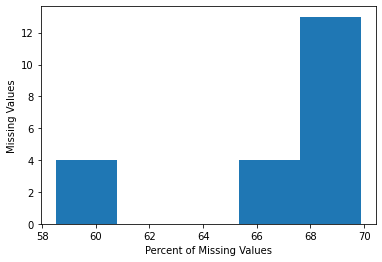

In [44]:
# percentage of missing values
data_list = []
for k,v in enumerate(percent_application_train):
    data_list.append(v)
    if k == 20:
        break

# Add title and axis names
plt.xlabel('Percent of Missing Values')
plt.ylabel('Missing Values')


#create a histogram of the missing values
plt.hist(data_list, bins=5)
plt.show()

## Missing data for POS_CASH_balance

In [45]:
percent = (datasets["POS_CASH_balance"].isnull().sum()/datasets["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["POS_CASH_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "POS_CASH_Missing Count"])
missing_application_train_data.head(10)

,Percent,POS_CASH_Missing Count
CNT_INSTALMENT_FUTURE,0.26,26087
CNT_INSTALMENT,0.26,26071
SK_ID_PREV,0.00,0
SK_ID_CURR,0.00,0
MONTHS_BALANCE,0.00,0
NAME_CONTRACT_STATUS,0.00,0
SK_DPD,0.00,0
SK_DPD_DEF,0.00,0


## Missing data for Bureau

In [46]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Bureau Missing Count"])
missing_application_train_data.head(10)

,Percent,Bureau Missing Count
AMT_ANNUITY,71.47,1226791
AMT_CREDIT_MAX_OVERDUE,65.51,1124488
DAYS_ENDDATE_FACT,36.92,633653
AMT_CREDIT_SUM_LIMIT,34.48,591780
AMT_CREDIT_SUM_DEBT,15.01,257669
DAYS_CREDIT_ENDDATE,6.15,105553
AMT_CREDIT_SUM,0.00,13
CREDIT_ACTIVE,0.00,0
CREDIT_CURRENCY,0.00,0
DAYS_CREDIT,0.00,0


## Missing data for bureau balance

In [47]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Bureau Balance Missing Count"])
missing_application_train_data.head(10)

,Percent,Bureau Balance Missing Count
SK_ID_BUREAU,0.0,0
MONTHS_BALANCE,0.0,0
STATUS,0.0,0


## Missing data for Credit Card Balance

In [48]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Credit Card Balance Missing Count"])
missing_application_train_data.head(10)

,Percent,Credit Card Balance Missing Count
AMT_PAYMENT_CURRENT,20.00,767988
AMT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_DRAWINGS_POS_CURRENT,19.52,749816
AMT_DRAWINGS_OTHER_CURRENT,19.52,749816
AMT_DRAWINGS_POS_CURRENT,19.52,749816
CNT_DRAWINGS_OTHER_CURRENT,19.52,749816
CNT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_INSTALMENT_MATURE_CUM,7.95,305236
AMT_INST_MIN_REGULARITY,7.95,305236
SK_ID_PREV,0.00,0


## Missing data for installment payments

In [49]:
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Installments Payments Count"])
missing_application_train_data.head(10)

,Percent,Installments Payments Count
DAYS_ENTRY_PAYMENT,0.02,2905
AMT_PAYMENT,0.02,2905
SK_ID_PREV,0.00,0
SK_ID_CURR,0.00,0
NUM_INSTALMENT_VERSION,0.00,0
NUM_INSTALMENT_NUMBER,0.00,0
DAYS_INSTALMENT,0.00,0
AMT_INSTALMENT,0.00,0


## Application test missing values

In [50]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


## POS_CASH_BALANCE EDA

In [51]:
print(datasets['POS_CASH_balance'].head())

   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0  


In [52]:
percent = (datasets["POS_CASH_balance"].isnull().sum()/datasets["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["POS_CASH_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "POS_CASH_Missing Count"])
missing_application_train_data.head(10)

,Percent,POS_CASH_Missing Count
CNT_INSTALMENT_FUTURE,0.26,26087
CNT_INSTALMENT,0.26,26071
SK_ID_PREV,0.00,0
SK_ID_CURR,0.00,0
MONTHS_BALANCE,0.00,0
NAME_CONTRACT_STATUS,0.00,0
SK_DPD,0.00,0
SK_DPD_DEF,0.00,0


#### Check data typs of the columns

In [53]:
print(datasets["POS_CASH_balance"].nunique())

SK_ID_PREV               936325
SK_ID_CURR               337252
MONTHS_BALANCE               96
CNT_INSTALMENT               73
CNT_INSTALMENT_FUTURE        79
NAME_CONTRACT_STATUS          9
SK_DPD                     3400
SK_DPD_DEF                 2307
dtype: int64


In [54]:
print(datasets["POS_CASH_balance"].dtypes)

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object


In [55]:
print(datasets["POS_CASH_balance"].describe().T)

                            count          mean            std        min  \
SK_ID_PREV             10001358.0  1.903217e+06  535846.530722  1000001.0   
SK_ID_CURR             10001358.0  2.784039e+05  102763.745090   100001.0   
MONTHS_BALANCE         10001358.0 -3.501259e+01      26.066570      -96.0   
CNT_INSTALMENT          9975287.0  1.708965e+01      11.995056        1.0   
CNT_INSTALMENT_FUTURE   9975271.0  1.048384e+01      11.109058        0.0   
SK_DPD                 10001358.0  1.160693e+01     132.714043        0.0   
SK_DPD_DEF             10001358.0  6.544684e-01      32.762491        0.0   

                             25%        50%        75%        max  
SK_ID_PREV             1434405.0  1896565.0  2368963.0  2843499.0  
SK_ID_CURR              189550.0   278654.0   367429.0   456255.0  
MONTHS_BALANCE             -54.0      -28.0      -13.0       -1.0  
CNT_INSTALMENT              10.0       12.0       24.0       92.0  
CNT_INSTALMENT_FUTURE        3.0        7.0

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64


<AxesSubplot:>

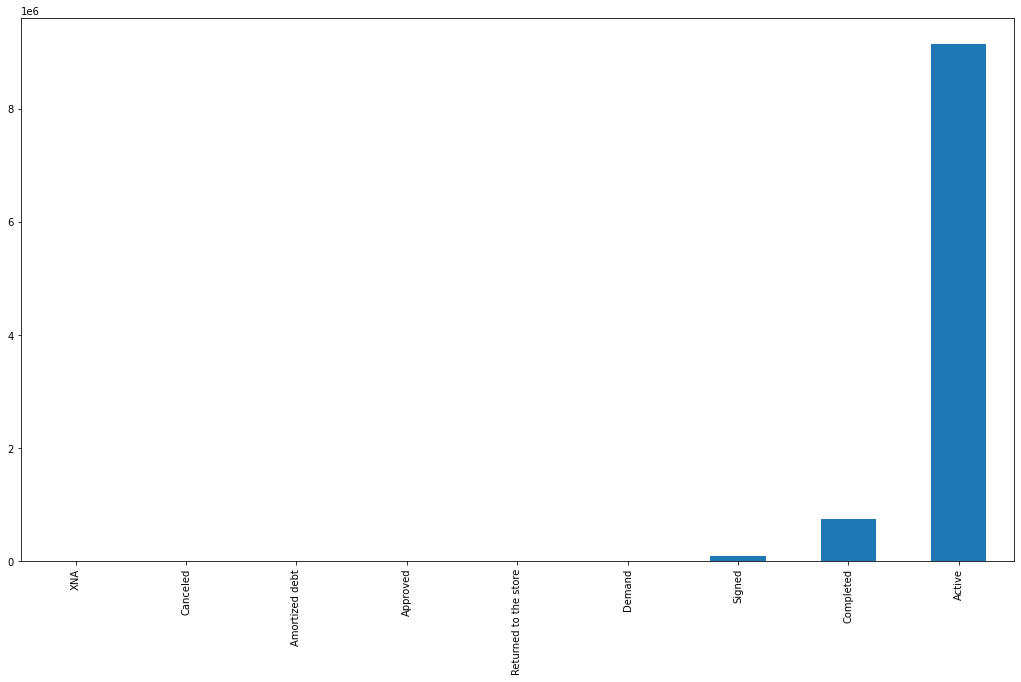

In [56]:
print(datasets["POS_CASH_balance"].NAME_CONTRACT_STATUS.value_counts())
#Plotting the line graph for each value
datasets["POS_CASH_balance"].NAME_CONTRACT_STATUS.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

## Credit card balance EDA

In [57]:
datasets["credit_card_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [58]:
datasets["credit_card_balance"].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [59]:
datasets["credit_card_balance"].isnull().values.any()

True

In [60]:
datasets["credit_card_balance"].isnull().sum().sum()

5877356

In [61]:
datasets["credit_card_balance"].isnull().add_prefix

<bound method NDFrame.add_prefix of          SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0             False       False           False        False   
1             False       False           False        False   
2             False       False           False        False   
3             False       False           False        False   
4             False       False           False        False   
...             ...         ...             ...          ...   
3840307       False       False           False        False   
3840308       False       False           False        False   
3840309       False       False           False        False   
3840310       False       False           False        False   
3840311       False       False           False        False   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                          False                     False   
1                          False                     False   
2        

In [62]:
#Extract columns that contain at least one missing value:
print(datasets["credit_card_balance"].loc[:, datasets["credit_card_balance"].isnull().any()]) #total 9 columns

         AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                             0.0                         0.0   
1                          2250.0                         0.0   
2                             0.0                         0.0   
3                          2250.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
3840307                       NaN                         NaN   
3840308                       0.0                         0.0   
3840309                  270000.0                         0.0   
3840310                       NaN                         NaN   
3840311                       0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
0                           877.5                 1700.325   
1                             0.0                 2250.000   
2                             0.0

In [63]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_application_train_data.head(20)

,Percent,Missing Count
AMT_PAYMENT_CURRENT,20.00,767988
AMT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_DRAWINGS_POS_CURRENT,19.52,749816
AMT_DRAWINGS_OTHER_CURRENT,19.52,749816
AMT_DRAWINGS_POS_CURRENT,19.52,749816
CNT_DRAWINGS_OTHER_CURRENT,19.52,749816
CNT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_INSTALMENT_MATURE_CUM,7.95,305236
AMT_INST_MIN_REGULARITY,7.95,305236
SK_ID_PREV,0.00,0


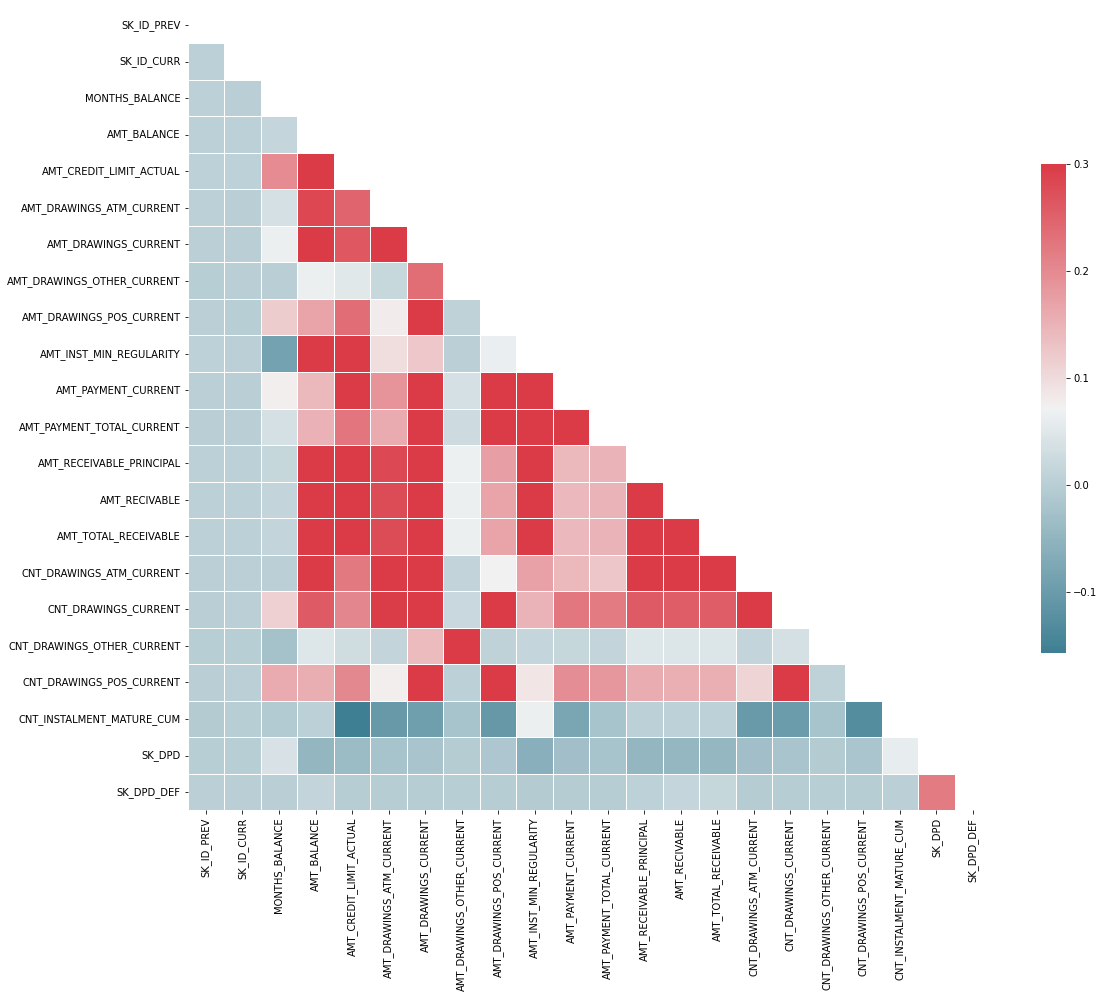

In [64]:
# compute the correlation matrix
corr=datasets["credit_card_balance"].corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

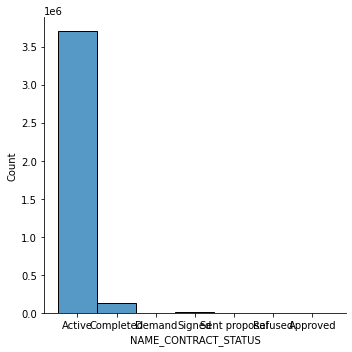

In [66]:
sns.displot(data=datasets["credit_card_balance"], x="NAME_CONTRACT_STATUS")

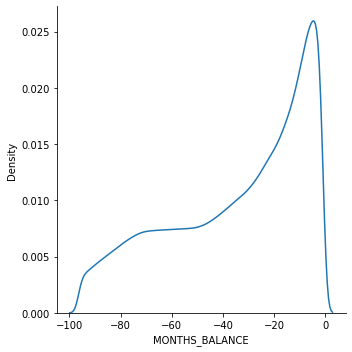

In [67]:
sns.displot(data=datasets["credit_card_balance"], x="MONTHS_BALANCE", kind="kde")

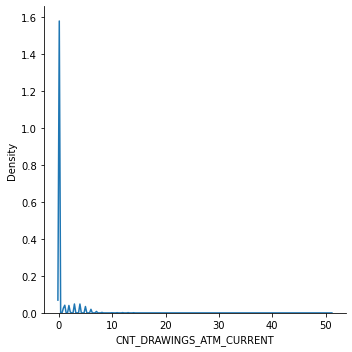

In [68]:
sns.displot(data=datasets["credit_card_balance"], x="CNT_DRAWINGS_ATM_CURRENT", kind="kde")

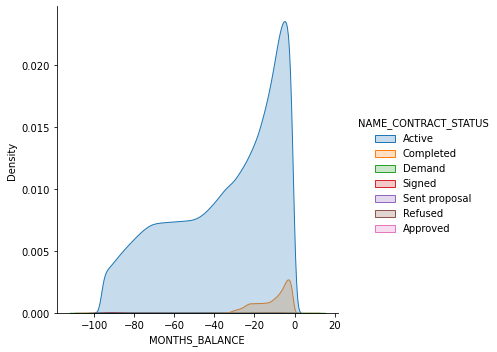

In [69]:
sns.displot(data=datasets["credit_card_balance"], x="MONTHS_BALANCE", hue="NAME_CONTRACT_STATUS", kind="kde", fill=True)

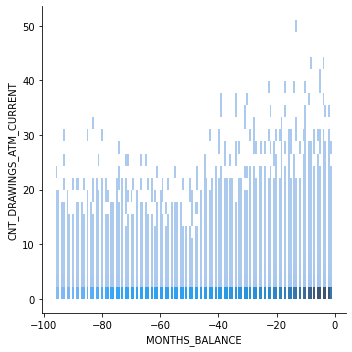

In [70]:
#bivariate distributions
sns.displot(data=datasets["credit_card_balance"], x="MONTHS_BALANCE", y="CNT_DRAWINGS_ATM_CURRENT")

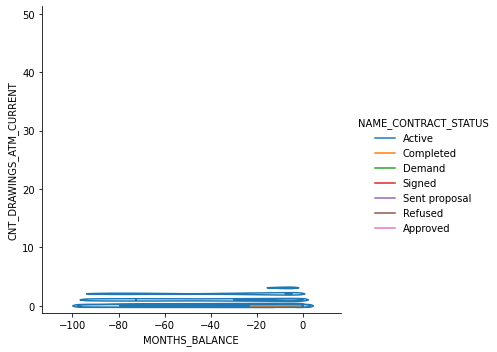

In [71]:
sns.displot(data=datasets["credit_card_balance"], x="MONTHS_BALANCE", y="CNT_DRAWINGS_ATM_CURRENT", hue="NAME_CONTRACT_STATUS", kind="kde")

## Previous Application EDA

In [72]:
datasets["previous_application"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [73]:
datasets["previous_application"].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Missing values analysis for previous application CSV

In [74]:
percent = (datasets["previous_application"].isnull().sum()/datasets["previous_application"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["previous_application"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_application_train_data.head(20)

,Percent,Missing Count
RATE_INTEREST_PRIVILEGED,99.64,1664263
RATE_INTEREST_PRIMARY,99.64,1664263
AMT_DOWN_PAYMENT,53.64,895844
RATE_DOWN_PAYMENT,53.64,895844
NAME_TYPE_SUITE,49.12,820405
NFLAG_INSURED_ON_APPROVAL,40.30,673065
DAYS_TERMINATION,40.30,673065
DAYS_LAST_DUE,40.30,673065
DAYS_LAST_DUE_1ST_VERSION,40.30,673065
DAYS_FIRST_DUE,40.30,673065


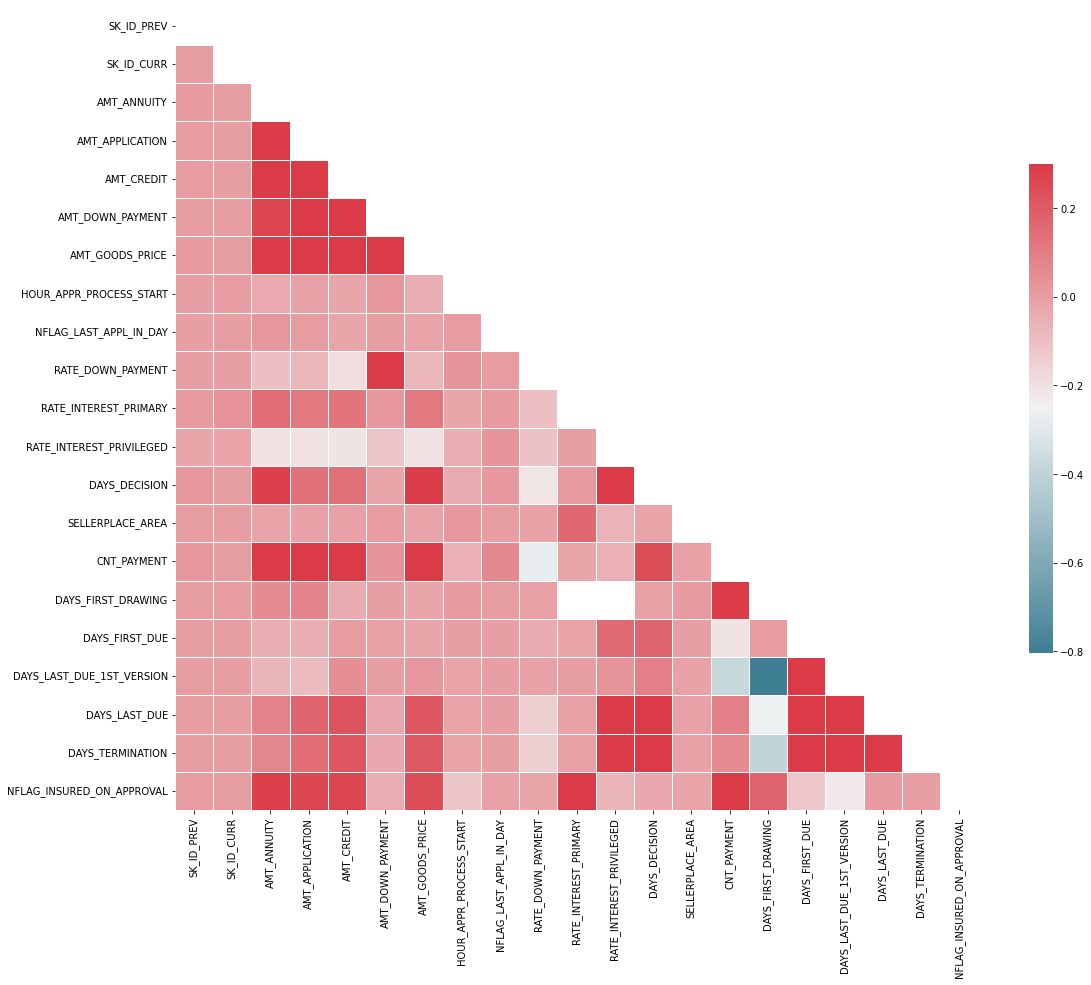

In [75]:
# compute the correlation matrix
corr=datasets["previous_application"].corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [76]:
datasets["previous_application"].isnull().add_prefix

<bound method NDFrame.add_prefix of          SK_ID_PREV  SK_ID_CURR  NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0             False       False               False        False   
1             False       False               False        False   
2             False       False               False        False   
3             False       False               False        False   
4             False       False               False        False   
...             ...         ...                 ...          ...   
1670209       False       False               False        False   
1670210       False       False               False        False   
1670211       False       False               False        False   
1670212       False       False               False        False   
1670213       False       False               False        False   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                  False       False             False            False 

In [77]:
#Extract columns that contain at least one missing value:
print(datasets["previous_application"].loc[:, datasets["previous_application"].isnull().any()]) #total 9 columns

         AMT_ANNUITY  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0           1730.430     17145.0               0.0          17145.0   
1          25188.615    679671.0               NaN         607500.0   
2          15060.735    136444.5               NaN         112500.0   
3          47041.335    470790.0               NaN         450000.0   
4          31924.395    404055.0               NaN         337500.0   
...              ...         ...               ...              ...   
1670209    14704.290    311400.0               0.0         267295.5   
1670210     6622.020     64291.5           29250.0          87750.0   
1670211    11520.855    102523.5           10525.5         105237.0   
1670212    18821.520    191880.0               NaN         180000.0   
1670213    16431.300    360000.0               NaN         360000.0   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0

In [78]:
uniqueValues = datasets["previous_application"].nunique()
print(uniqueValues)

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

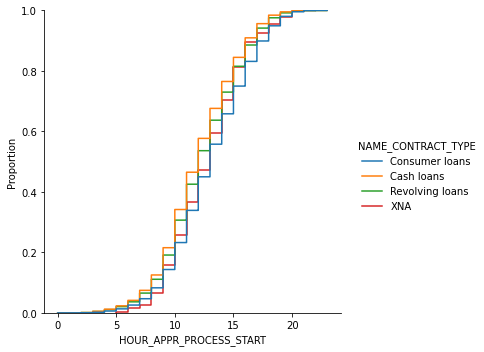

In [79]:
sns.displot(data=datasets["previous_application"], x="HOUR_APPR_PROCESS_START", hue="NAME_CONTRACT_TYPE", kind="ecdf")

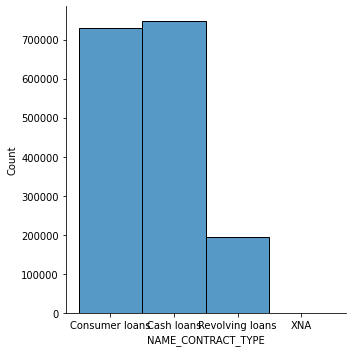

In [80]:
sns.displot(data=datasets["previous_application"], x="NAME_CONTRACT_TYPE")

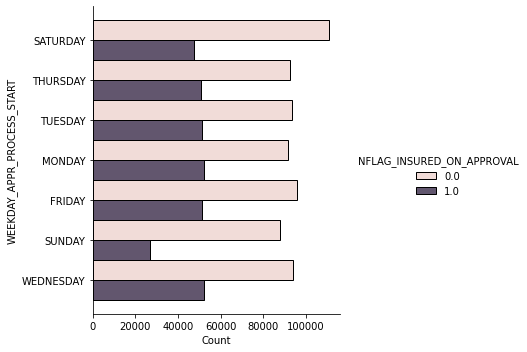

In [83]:
sns.displot(data=datasets["previous_application"], y="WEEKDAY_APPR_PROCESS_START", hue="NFLAG_INSURED_ON_APPROVAL", multiple="dodge")

## Bureau.csv EDA
<br>
<b> SK_ID_CURR = ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau 
    <br> foreign key used to join application_train.csv </b>
<br>
<br>

<b> SK_BUREAU_ID = Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
    <br>foreign key used to join credit_bureau.csv  </b>
<br>

<br>
<b> CREDIT_ACTIVE = Status of the Credit Bureau (CB) reported credits
    <br>
    Categorical variable containing 4 unique values ('Active', 'Bad debt', 'Closed', and 'Sold) </b>

In [82]:
datasets['bureau'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [84]:
datasets["bureau"].describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


There are 0 of missing values for CREDIT_ACTIVE variable

The different types of categories are {'Sold', 'Active', 'Bad debt', 'Closed'}

The count of different categories are : 
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64



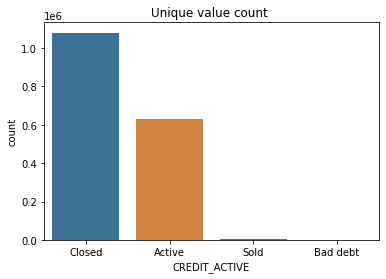

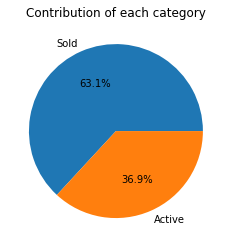

In [85]:
# getting the count of missing values
print(f"There are {datasets['bureau']['CREDIT_ACTIVE'].isnull().sum()} of missing values for CREDIT_ACTIVE variable")
print()

# getting the different types of categories
print(f"The different types of categories are {set(datasets['bureau']['CREDIT_ACTIVE'])}")
print()

# getting the count of each of the category
print("The count of different categories are : ")
print(datasets['bureau']['CREDIT_ACTIVE'].value_counts())
print()

# plotting the histogram for count and category 
fig = sns.countplot(datasets['bureau']['CREDIT_ACTIVE'], saturation=0.6)
fig.set_title("Unique value count ")
plt.show()
print()
print()

# plotting piechart for getting the percentage contribution
plt.pie(datasets['bureau']['CREDIT_ACTIVE'].value_counts().tolist()[:2], labels=list(set(datasets['bureau']['CREDIT_ACTIVE']))[:2], autopct='%1.1f%%')
plt.title("Contribution of each category")
plt.show()

From the above graphs, we can see that there CREDIT_ACTIVE column is a categorical variable having 4 values i.e. Closed, Active, Sold and Bad debt respectively. There are around 1.5 million people for which the credit bureau has reported credit status as Closed which is the highest, followed by 600 thousand Active credit status. Sold and Bad debt credit values have negligible values as compared to Active and Closed categories. 63.1% of the values are contributed by Active status and around 36.9% of the values are contributed by Bad Debt categories

<br>
<b> CREDIT_CURRENCY = Recoded currency of the Credit Bureau credit
    <br>
Categorical variable containing 4 types of Currencies ('currency 1', 'currency 2', 'currency 3', and 'currency 4') </b>

There are 0 of missing values for CREDIT_CURRENCY variable

The different types of categories are ['currency 1', 'currency 2', 'currency 3', 'currency 4']

The count of different categories are : 
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64



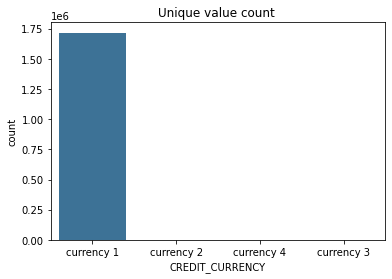

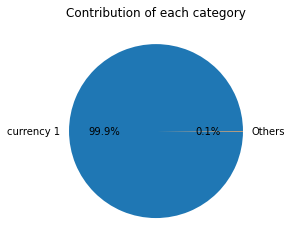

In [86]:
# getting the count of missing values
print(f"There are {datasets['bureau']['CREDIT_CURRENCY'].isnull().sum()} of missing values for CREDIT_CURRENCY variable")
print()

# getting the different types of categories
print(f"The different types of categories are {sorted(set(datasets['bureau']['CREDIT_CURRENCY']))}")
print()

# getting the count of each of the category
print("The count of different categories are : ")
print(datasets['bureau']['CREDIT_CURRENCY'].value_counts())
print()

# plotting the histogram for count and category 
fig = sns.countplot(datasets['bureau']['CREDIT_CURRENCY'], saturation=0.6)
fig.set_title("Unique value count ")
plt.show()
print()
print()

# plotting piechart for getting the percentage contribution
labels_list = ['currency 1', 'Others']
plt.pie([datasets['bureau']['CREDIT_CURRENCY'].value_counts().tolist()[0], sum(datasets['bureau']['CREDIT_CURRENCY'].value_counts().tolist()[1:])], labels=labels_list, autopct='%1.1f%%')
plt.title("Contribution of each category")
plt.show()

From the above graphs, we can see that there CREDIT_CURRENCY column is a categorical variable having 4 values i.e. 'currency 1', 'currency 2', 'currency 3', and 'currency 4'  respectively. There are around 1.7 million people for which the credit bureau has reported credit currency as currency 1 which is the highest, and contributes almost 99.99% of the total reported values

<br>
<b> DAYS_CREDIT : How many days before current application did client apply for Credit Bureau credit 
<br>
    Numerical variable containing values from range -2922 to 0
    <br>
    Negative sign only indicates that the applicant has applied prior to the current application date, and has no other significance
</b>

Minimum value for DAYS_CREDIT variable is -2922

Maximum value for DAYS_CREDIT variable is 0

There are 0 of missing values for DAYS_CREDIT variable



Text(0.5, 1.0, 'Year - Count distribution for DAYS_CREDIT variable')

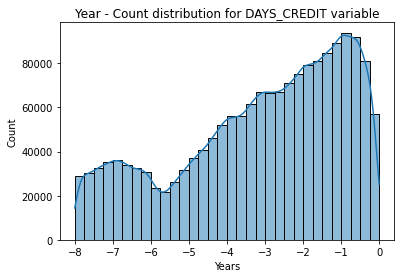

In [87]:
# getting the minimum value of the DAYS_CREDIT variable
print(f"Minimum value for DAYS_CREDIT variable is {min(datasets['bureau']['DAYS_CREDIT'])}")
print()

# getting the maximum value of the DAYS_CREDIT variable
print(f"Maximum value for DAYS_CREDIT variable is {max(datasets['bureau']['DAYS_CREDIT'])}")
print()

# getting the count of missing values
print(f"There are {datasets['bureau']['DAYS_CREDIT'].isnull().sum()} of missing values for DAYS_CREDIT variable")
print()

# getting the distribution of the DAYS_CREDIT variable by plotting histogram
sns.histplot(datasets['bureau']['DAYS_CREDIT'] / 365, bins = 32, kde=True)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Year - Count distribution for DAYS_CREDIT variable")

From the above histogram, we can see that most of the people (about 100,000) have applied for bureau credit 1 year prior to their application. The general trend for applying for bureau credit increases from -5 years and has maximum peak values in the range -2.5 years to -0.5 years

<br>
<b> CREDIT_DAY_OVERDUE : Number of days past due on CB credit at the time of application for related loan in our sample
<br>
    Numerical variable containing values from range 0 to 2792
    <br>
</b>

Minimum value for CREDIT_DAY_OVERDUE variable is 0

Maximum value for CREDIT_DAY_OVERDUE variable is 2792

There are 0 of missing values for CREDIT_DAY_OVERDUE variable



Text(0.5, 1.0, 'distribution for CREDIT_DAY_OVERDUE variable')

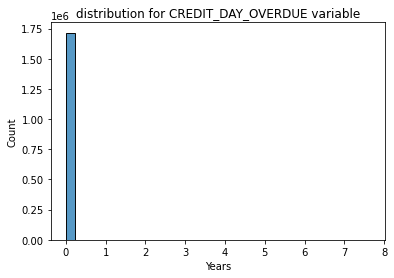

In [88]:
# getting the minimum value of the CREDIT_DAY_OVERDUE variable
print(f"Minimum value for CREDIT_DAY_OVERDUE variable is {min(datasets['bureau']['CREDIT_DAY_OVERDUE'])}")
print()

# getting the maximum value of the CREDIT_DAY_OVERDUE variable
print(f"Maximum value for CREDIT_DAY_OVERDUE variable is {max(datasets['bureau']['CREDIT_DAY_OVERDUE'])}")
print()

# getting the count of missing values
print(f"There are {datasets['bureau']['CREDIT_DAY_OVERDUE'].isnull().sum()} of missing values for CREDIT_DAY_OVERDUE variable")
print()

# getting the distribution of the CREDIT_DAY_OVERDUE variable by plotting histogram
sns.histplot(datasets['bureau']['CREDIT_DAY_OVERDUE'] / 365, bins=32)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("distribution for CREDIT_DAY_OVERDUE variable")

From the above histogram, we can see that almost all of the people (about 99%) have credit overdue for 3 months

<br>
<b> DAYS_CREDIT_ENDDATE : Remaining duration of CB credit (in days) at the time of application in Home Credit
<br>
    Numerical variable containing values from range 0 to 2792
    <br>
</b>

Minimum value for DAYS_CREDIT_ENDDATE variable is -42060.0 days

Maximum value for DAYS_CREDIT_ENDDATE variable is 31199.0 days

There are 105553 of missing values for DAYS_CREDIT_ENDDATE variable



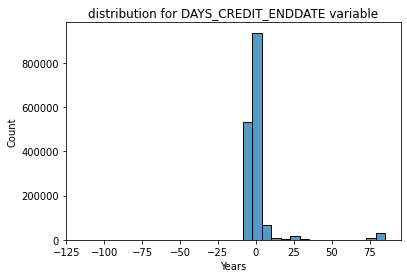

Text(0.5, 1.0, 'distribution for DAYS_CREDIT_ENDDATE variable from -25 to 25 years')

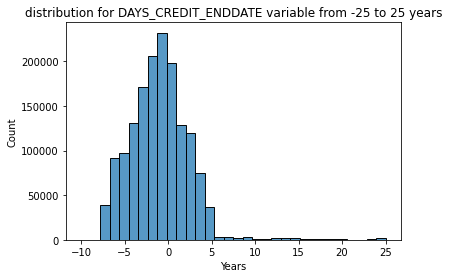

In [89]:
# getting the minimum value of the DAYS_CREDIT_ENDDATE variable
print(f"Minimum value for DAYS_CREDIT_ENDDATE variable is {min(datasets['bureau']['DAYS_CREDIT_ENDDATE'])} days")
print()

# getting the maximum value of the DAYS_CREDIT_ENDDATE variable
print(f"Maximum value for DAYS_CREDIT_ENDDATE variable is {max(datasets['bureau']['DAYS_CREDIT_ENDDATE'])} days")
print()

# getting the count of missing values
print(f"There are {datasets['bureau']['DAYS_CREDIT_ENDDATE'].isnull().sum()} of missing values for DAYS_CREDIT_ENDDATE variable")
print()

# getting the distribution of the DAYS_CREDIT_ENDDATE variable by plotting histogram
sns.histplot(datasets['bureau']['DAYS_CREDIT_ENDDATE'] / 365, bins=32)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("distribution for DAYS_CREDIT_ENDDATE variable")
plt.show()

# getting the distribution of the from last 25 years to future 25 years by plotting histogram
sns.histplot(datasets['bureau']['DAYS_CREDIT_ENDDATE'] / 365, bins=32, binrange=(-10, 25))
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("distribution for DAYS_CREDIT_ENDDATE variable from -25 to 25 years")

From the above histograms, we can see that most of the values for  DAYS_CREDIT_ENDDATE fall in the range -10 years to 25 years.
<b> Negative sign indicates that the client has exhausted their credit, 0 indicates client has no credit and a positive amount indicates that how many days does the client has until they are out of credit. This time is only relative to the application
</b>

## Bureau balance EDA

In [90]:
datasets['bureau_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [91]:
datasets["bureau_balance"].describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [22]:
datasets["bureau_balance"].describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


## Join datasets with application_train and application_test
* Add new features after and before join

In [9]:
## add new feature of no of applciations
previous_loan_counts = datasets["bureau"].groupby('SK_ID_CURR',
                                                  as_index=False)['SK_ID_BUREAU'].count().rename(columns =
                                                                                   {'SK_ID_BUREAU': 'previous_loan_counts'})
bureau_grp = datasets["bureau"]
bureau_grp = bureau_grp.merge(previous_loan_counts, how="inner", on="SK_ID_CURR", suffixes=('', 'prev_loan_cnt'))
bureau_grp_bal = datasets["bureau_balance"].groupby("SK_ID_BUREAU").mean()
bureau_grp = bureau_grp.merge(bureau_grp_bal.reset_index(), how='left', on='SK_ID_BUREAU', suffixes=('', '_bur_bal'))
bureau_grp = bureau_grp.groupby("SK_ID_CURR").mean()

In [10]:
import gc
gc.enable()
# datasets["application_train"] = datasets["application_train"].head(50000).copy()
datasets["application_train"] = datasets["application_train"]
train_dataset_name = "application_train"

## TRAIN - Joining the data for bureau and bureau balence

## joining application_train with datasets_bureau
datasets[train_dataset_name] = datasets[train_dataset_name].merge(bureau_grp.reset_index(),
                                                                    how="left", on="SK_ID_CURR", suffixes=('', '_bur'))

## TEST - Joining the data for bureau and bureau balence
datasets["application_test"] = datasets["application_test"].merge(bureau_grp.reset_index(),
                                                                  how="left", on="SK_ID_CURR", suffixes=('', '_bur'))
print("application_train: ", datasets[train_dataset_name].shape)
print("application_test: ", datasets["application_test"].shape)

application_train:  (307511, 137)
application_test:  (48744, 136)


In [11]:
## joining the application_train with previous_applications
datasets["previous_application"] = datasets["previous_application"].groupby("SK_ID_CURR").mean()
datasets[train_dataset_name] = datasets[train_dataset_name].merge(datasets["previous_application"].reset_index(),
                                                                    how="left", on="SK_ID_CURR", suffixes=('', '_prev_app'))

## joining the application_train with previous_applications
datasets['application_test'] = datasets['application_test'].merge(datasets["previous_application"].reset_index(),
                                                                  how="left", on="SK_ID_CURR", suffixes=('', '_prev_app'))
print("application_train: ", datasets[train_dataset_name].shape)
print("application_test: ", datasets["application_test"].shape)

application_train:  (307511, 157)
application_test:  (48744, 156)


In [12]:
## joining the application_train with POS_CASH_balance
datasets["POS_CASH_balance"] = datasets["POS_CASH_balance"].groupby("SK_ID_CURR").mean()
datasets[train_dataset_name] = datasets[train_dataset_name].merge(datasets["POS_CASH_balance"].reset_index(),
                                                                              how="left", on="SK_ID_CURR", suffixes=('', '_pos_cash'))

datasets['application_test'] = datasets['application_test'].merge(datasets["POS_CASH_balance"].reset_index(),
                                                                  how="left", on="SK_ID_CURR", suffixes=('', '_pos_cash'))
print('application_train: ', datasets[train_dataset_name].shape)
print('application_test: ', datasets['application_test'].shape)

application_train:  (307511, 163)
application_test:  (48744, 162)


In [13]:
## joining the application_train with installments_payments
datasets["installments_payments"] = datasets["installments_payments"].groupby("SK_ID_CURR").mean()
datasets[train_dataset_name] = datasets[train_dataset_name].merge(datasets["installments_payments"].reset_index(),
                                                                              how="left", on="SK_ID_CURR", suffixes=('', '_install_paym'))
datasets['application_test'] = datasets['application_test'].merge(datasets["installments_payments"].reset_index(),
                                                                  how="left", on="SK_ID_CURR", suffixes=('', '_install_paym'))
print('application_train: ', datasets[train_dataset_name].shape)
print('application_test: ', datasets['application_test'].shape)

application_train:  (307511, 170)
application_test:  (48744, 169)


In [14]:
## joining the application_train with credit_card_balance
datasets["credit_card_balance"] = datasets["credit_card_balance"].groupby("SK_ID_CURR").mean()
datasets[train_dataset_name] = datasets[train_dataset_name].merge(datasets["credit_card_balance"].reset_index(),
                                                                              how="left", on="SK_ID_CURR", suffixes=('', '_cc_bal'))

datasets['application_test'] = datasets['application_test'].merge(datasets["credit_card_balance"].reset_index(),
                                                                  how="left", on="SK_ID_CURR", suffixes=('', '_cc_bal'))
print('application_train: ', datasets[train_dataset_name].shape)
print('application_test: ', datasets['application_test'].shape)

application_train:  (307511, 191)
application_test:  (48744, 190)


### New features
* NEW_CAR_TO_BIRTH_GAP = DAYS_BIRTH - OWN_CAR_AGE
* NEW_EMPLOY_TO_BIRTH_GAP = DAYS_BIRTH - DAYS_EMPLOYED


In [15]:
datasets[train_dataset_name]['NEW_CAR_TO_BIRTH_GAP'] = datasets[train_dataset_name]['DAYS_BIRTH']- datasets[train_dataset_name]['OWN_CAR_AGE']
datasets['application_test']['NEW_CAR_TO_BIRTH_GAP'] = datasets['application_test']['DAYS_BIRTH']- datasets['application_test']['OWN_CAR_AGE']

datasets[train_dataset_name]['NEW_EMPLOY_TO_BIRTH_GAP'] = datasets[train_dataset_name]['DAYS_BIRTH']- datasets[train_dataset_name]['DAYS_EMPLOYED']
datasets['application_test']['NEW_EMPLOY_TO_BIRTH_GAP'] = datasets['application_test']['DAYS_BIRTH']- datasets['application_test']['DAYS_EMPLOYED']

## Let's check the correleation of new features

In [16]:
corr = datasets[train_dataset_name][['NEW_CAR_TO_BIRTH_GAP', 'NEW_EMPLOY_TO_BIRTH_GAP', 'TARGET']].corr()
corr

,NEW_CAR_TO_BIRTH_GAP,NEW_EMPLOY_TO_BIRTH_GAP,TARGET
NEW_CAR_TO_BIRTH_GAP,1.000000,0.534538,0.056881
NEW_EMPLOY_TO_BIRTH_GAP,0.534538,1.000000,0.046451
TARGET,0.056881,0.046451,1.000000


NEW_CAR_TO_BIRTH_GAP and NEW_EMPLOY_TO_BIRTH_GAP has some correlation with target. It may means nothing but, it has some correlation on data.

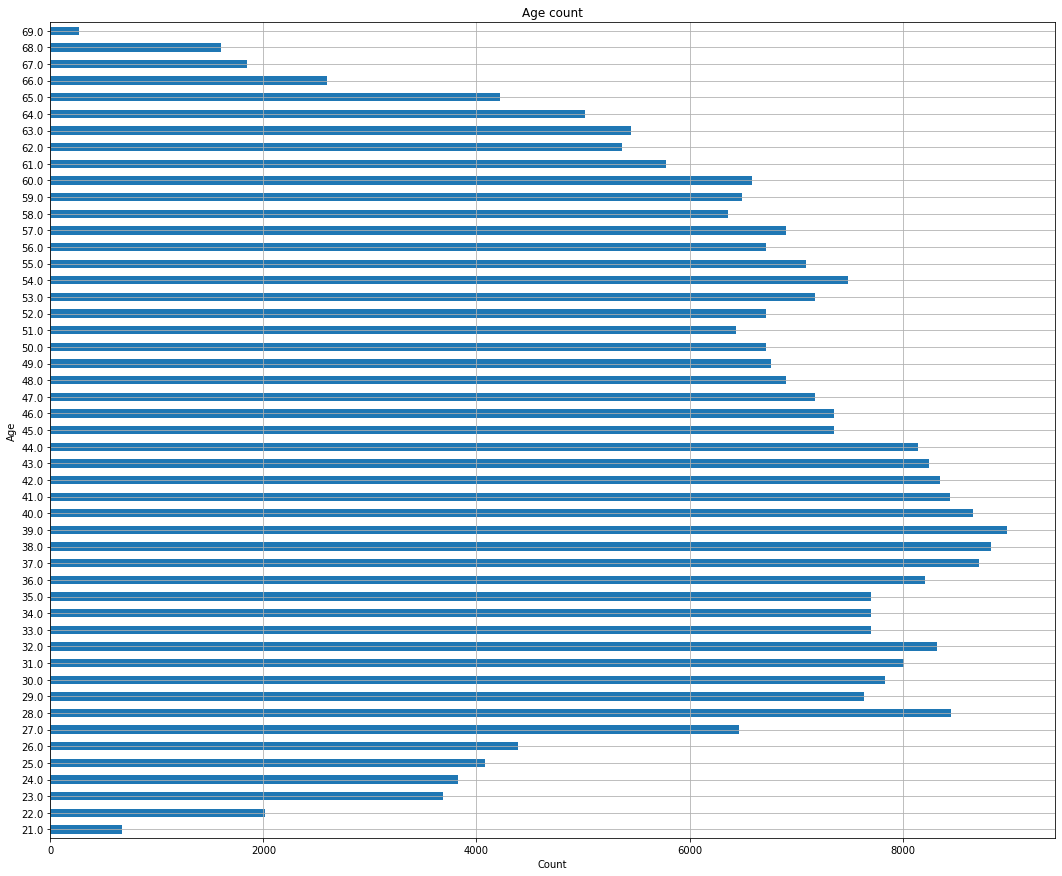

In [17]:
# add years column
datasets[train_dataset_name]['YEARS_BIRTH'] = np.abs(datasets[train_dataset_name]['DAYS_BIRTH']) / 365.25
datasets['application_test']['YEARS_BIRTH'] = np.abs(datasets['application_test']['DAYS_BIRTH']) / 365.25
plt.figure(figsize=(18, 15))
datasets[train_dataset_name]['YEARS_BIRTH'].round(0).value_counts().sort_index().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Age count')
plt.grid()

In [18]:
# column represent the credit/income percentage 
datasets[train_dataset_name]['Credit/Income'] = datasets[train_dataset_name]['AMT_CREDIT']/datasets[train_dataset_name]['AMT_INCOME_TOTAL']
datasets['application_test']['Credit/Income'] = datasets['application_test']['AMT_CREDIT']/datasets['application_test']['AMT_INCOME_TOTAL']

In [19]:
# column represent the annuity/income percentage
datasets[train_dataset_name]['Annuity/Income'] = datasets[train_dataset_name]['AMT_ANNUITY']/datasets[train_dataset_name]['AMT_INCOME_TOTAL']
datasets['application_test']['Annuity/Income'] = datasets['application_test']['AMT_ANNUITY']/datasets['application_test']['AMT_INCOME_TOTAL']

In [20]:
# column represent the days employed percentage
datasets[train_dataset_name]['Employed/Birth'] = datasets[train_dataset_name]['DAYS_EMPLOYED']/datasets[train_dataset_name]['DAYS_BIRTH']
datasets['application_test']['Employed/Birth'] = datasets['application_test']['DAYS_EMPLOYED']/datasets['application_test']['DAYS_BIRTH']

In [21]:
# flag represents if applicant's age greater than 32 or not
datasets[train_dataset_name]['Flag_Greater_32'] = datasets[train_dataset_name]['YEARS_BIRTH'].apply(lambda x: 1 if x > 32 else 0)
datasets['application_test']['Flag_Greater_32'] = datasets['application_test']['YEARS_BIRTH'].apply(lambda x: 1 if x > 32 else 0)

In [22]:
# flag represents if applicant's employment years is greater than 5 or not
datasets[train_dataset_name]['Flag_Employment_Greater_5'] = (datasets[train_dataset_name]['DAYS_EMPLOYED']/-365.25).apply(lambda x: 1 if x > 5 else 0)
datasets['application_test']['Flag_Employment_Greater_5'] = (datasets['application_test']['DAYS_EMPLOYED']/-365.25).apply(lambda x: 1 if x > 5 else 0)

In [23]:
# flag represents if applicant's income is greater than the loan or not
datasets[train_dataset_name]['Flag_Income_Greater_Credit'] = datasets[train_dataset_name]['AMT_INCOME_TOTAL'] > datasets[train_dataset_name]['AMT_CREDIT']
datasets['application_test']['Flag_Income_Greater_Credit'] = datasets['application_test']['AMT_INCOME_TOTAL'] > datasets['application_test']['AMT_CREDIT']

In [24]:
# Create polynomial featues for columns having top positive and negative correlations
# ref https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/
cols = ['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1']
new_features_column = []
for col in cols:
    for i in [2,3]:
        new_features_column.append(f'{col}_power_{i}')
        datasets[train_dataset_name][f'{col}_power_{i}'] = datasets[train_dataset_name][col] ** i
        datasets['application_test'][f'{col}_power_{i}'] = datasets['application_test'][col] ** i

In [25]:
new_features_column += ['Credit/Income', 'Annuity/Income', 'Employed/Birth',
                        'Flag_Greater_32', 'Flag_Employment_Greater_5', 'Flag_Income_Greater_Credit', 'TARGET']

In [26]:
# Lets check correlation sof new columns
corr = datasets[train_dataset_name][new_features_column].corr()
corr["TARGET"].sort_values(ascending=True)

EXT_SOURCE_3_power_2                  -0.160346
EXT_SOURCE_2_power_2                  -0.149669
EXT_SOURCE_3_power_3                  -0.143904
EXT_SOURCE_2_power_3                  -0.140392
EXT_SOURCE_1_power_2                  -0.139878
EXT_SOURCE_1_power_3                  -0.126739
DAYS_BIRTH_power_2                    -0.076672
Flag_Greater_32                       -0.058933
Flag_Employment_Greater_5             -0.047424
Flag_Income_Greater_Credit            -0.012294
Credit/Income                         -0.007727
Annuity/Income                         0.014265
Employed/Birth                         0.042206
REGION_RATING_CLIENT_power_3           0.055685
REGION_RATING_CLIENT_power_2           0.057930
REGION_RATING_CLIENT_W_CITY_power_3    0.058058
REGION_RATING_CLIENT_W_CITY_power_2    0.060256
DAYS_BIRTH_power_3                     0.074273
TARGET                                 1.000000
Name: TARGET, dtype: float64

#### Drop columns identified in data leakage

In [27]:
dataset_train_lk = datasets[train_dataset_name]

In [28]:
dataset_train_lk = dataset_train_lk[~dataset_train_lk.CODE_GENDER.isin(['XNA'])]
dataset_train_lk = dataset_train_lk[~dataset_train_lk.NAME_INCOME_TYPE.isin(['Maternity leave'])]
dataset_train_lk = dataset_train_lk[~dataset_train_lk.NAME_FAMILY_STATUS.isin(['Unknown'])]

In [29]:
print(dataset_train_lk['CODE_GENDER'].value_counts())
print(dataset_train_lk['NAME_INCOME_TYPE'].value_counts())
print(dataset_train_lk['NAME_FAMILY_STATUS'].value_counts())

F    202443
M    105057
Name: CODE_GENDER, dtype: int64
Working                 158771
Commercial associate     71614
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Name: NAME_INCOME_TYPE, dtype: int64
Married                 196424
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64


In [30]:
dataset_train_lk.shape

(307500, 212)

In [31]:
y = dataset_train_lk["TARGET"]
x = dataset_train_lk.drop("TARGET", axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [32]:
#one hot encode the data
# extracting the cat and num features
cat_features = x_train.columns.values[x_train.dtypes.values == 'O'].tolist()
num_features = [c for c in x_train.columns if c not in cat_features]

print("No of cat features: ", len(cat_features))
print(cat_features)

print()
print("No of num features: ", len(num_features))
print(num_features)

No of cat features:  16
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

No of num features:  195
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 

In [33]:
# finding the number of unique categories in each categorical features
print(datasets[train_dataset_name][cat_features].nunique().sort_values().sum())
datasets[train_dataset_name][cat_features].nunique().sort_values()

140


NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

## Define dataframe to log the experiments

In [34]:
experimentLog = pd.DataFrame(columns=["Pipeline", "Parameters", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Best Params"])

## Creating pipeline for numerical and categorical features

In [35]:
from sklearn.compose import ColumnTransformer

# transforming the numerical features
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessing_pipe = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    n_jobs = -1,
    verbose = True,
)

## transforming the train, test, and validation data

In [36]:
x_train = preprocessing_pipe.fit_transform(x_train)
x_valid = preprocessing_pipe.transform(x_valid)
x_test = preprocessing_pipe.transform(x_test)

print(x_train.shape)
print(y_train.shape)

(150675, 332)
(150675,)


## The below cell get's features after applying the columnTranformer.
After applying the columnTranformer, we have get_feature_names method, However default method gives an error because of the multiple pipelines

In [37]:
#ref https://johaupt.github.io/blog/columnTransformer_feature_names.html
import sklearn
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names
columns_after_ohe = get_feature_names(preprocessing_pipe)
print(len(columns_after_ohe))
print(columns_after_ohe)

332
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUIL

In [38]:
# Check if no of features are correct
len(x_train[0])

332

## Experiments for baseline model (THE ULTIMATE TRUTH) using following algorithms

* Logistic Regression
* Decision Tree
* Random Forest
* LGBM
* XGBoost

We are experimenting with different model parameters and using ***roc_auc*** to calculate accuracy   

In [39]:
import time
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# training the logistic regression model on the data
logit_pipeline = Pipeline(
    [
        ('lr', LogisticRegression(solver='saga'))
    ]
)

logit_params = {'lr__C' : [1, .1, 0.01], 
          'lr__penalty' :  ['l1', 'l2', 'elasticnet']
         }

decision_tree_pipe = Pipeline(
    [
        ('dt', DecisionTreeClassifier())
    ]
)

decision_tree_params = {
    'dt__max_depth' : [10, 15, 20],
    'dt__splitter': ["best", "random"],
    'dt__min_samples_split': [2,4]
}

random_forest_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

random_forest_param = {
    'rf__max_depth' : [5, 10],
    'rf__n_estimators' : [50, 100],
    'rf__criterion' : ['gini']
}

xgboost_pipe = Pipeline(
    [
        ('xgb', xgb.XGBClassifier())
    ]
)

xgboost_params = {
    'xgb__min_child_weight': [19.0, 25.0],        
    'xgb__objective': ['binary:logistic'],  
    'xgb__max_depth': [5,7,8],                   
    'xgb__eta': [0.025],                     
    'xgb__eval_metric': ['auc'],             
    'xgb__max_delta_step': [1.0, 1.8],          
    'xgb__colsample_bytree':[0.4, 0.1],               
    'xgb__subsample': [0.8, 0.4],
    'xgb__gamma': [0.65]
    
}
lightgbm_pipe=Pipeline([
    ('LGBMClassifier',LGBMClassifier())
    ]
)

lightgbm_params={
    'LGBMClassifier__boosting_type':['gbdt', 'goss', 'rf'],  
    'LGBMClassifier__max_depth':[-1, 8],
    'LGBMClassifier__n_estimators':[100, 50, 75],
    'LGBMClassifier__random_state':[0],
    'LGBMClassifier__learning_rate':[0.1, 0.02]
}

grid_for = {
    "logistic_regression": {
        'pipeline' : logit_pipeline,
        "params" : logit_params
    },
   "decision_tree":{
        'pipeline' : decision_tree_pipe,
        "params" : decision_tree_params
    },
    "random_forest":{
        'pipeline' : random_forest_pipe,
        "params" : random_forest_param
    },
#   'xgboost' : {
#     'pipeline' : xgboost_pipe,
#     "params" : xgboost_params
#     },
    'lightgbm':{
        'pipeline': lightgbm_pipe,
        "params":lightgbm_params,
        
    }
}

grid_search_best_params = {}

for key in grid_for:
    pipe_dict = grid_for[key]
    print(f"running for {pipe_dict['pipeline']}")
    # applying gridsearchcv
    grid_search_cv = GridSearchCV(pipe_dict["pipeline"], pipe_dict["params"], cv=5, verbose=51,
                                      refit=True, n_jobs=-1, scoring='roc_auc')
    grid_search_cv.fit(x_train, y_train)
    best_lr_params = grid_search_cv.best_estimator_
    print('Best parameter: ', best_lr_params)
    
    grid_search_best_params[key] = grid_search_cv
    
    # getting the trainAcc
    start = time.time()
    trainAcc = best_lr_params.score(x_train, y_train)
    train_time = time.time() - start

    # getting the validAcc
    validAcc = best_lr_params.score(x_valid, y_valid)

    # getting the testAcc
    start = time.time()
    testAcc = best_lr_params.score(x_test, y_test)
    test_time = time.time() - start


    experimentLog.loc[len(experimentLog)] =[f"Baseline {key} with {x_train.shape[1]} inputs", f"{pipe_dict['params']}", 
                                            f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                            train_time, test_time, best_lr_params.get_params()]
    
    print(f"Completed for {pipe_dict['pipeline']}")

running for Pipeline(steps=[('lr', LogisticRegression(solver='saga'))])
[ColumnTransformer] ........... (1 of 2) Processing num, total=  17.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total= 1.7min
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    5.6s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   3 out of  45 | elapsed:    5.9s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   4 out of  45 | elapsed:    6.0s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of  45 | elapsed:    6.2s remaining:   49.2s
[Parallel(n_jobs=-1)]: Done   6 out of  45 | elapsed:    6.3s remaining:   41.2s
[Parallel(n_jobs=-1)]: Done   7 out of  45 | elapsed:    6.4s remaining:   34.7s
[Parallel(n_jobs=-1)]: Done   8 out of  45 | elapsed:    6.4s remaining:   29.6s
[Parallel(n_jobs=-1)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.1, lr__penalty=l2 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l2, score=0.768, total= 1.1min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50 .......
[CV]  rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50, score=0.746, total=  36.0s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.759, total=  19.5s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)


[CV] lr__C=0.1, lr__penalty=elasticnet ...............................
[CV] ..... lr__C=0.1, lr__penalty=elasticnet, score=nan, total=   0.3s
[CV] rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50 ........
[CV]  rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50, score=0.723, total=  19.4s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.766, total=  19.9s
[CV] lr__C=0.1, lr__penalty=l1 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l1, score=0.753, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClass

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[Parallel(n_jobs=-1)]: Done   5 out of 180 | elapsed:   24.5s remaining: 14.3min
[CV] lr__C=1, lr__penalty=l2 .........................................
[CV] ............. lr__C=1, lr__penalty=l2, score=0.754, total= 1.1min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50 .......
[CV]  rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50, score=0.757, total=  31.7s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.774, total=  20.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=1, lr__penalty=elasticnet .................................
[CV] ....... lr__C=1, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best, score=0.573, total=  33.2s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.772, total=  20.6s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)


[Parallel(n_jobs=-1)]: Done   9 out of 180 | elapsed:   25.4s remaining:  8.0min
[CV] lr__C=0.01, lr__penalty=elasticnet ..............................
[CV] .... lr__C=0.01, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best, score=0.566, total=  33.2s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.761, total=  20.8s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=1, lr__penalty=l2 .........................................
[CV] ............. lr__C=1, lr__penalty=l2, score=0.755, total= 1.1min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50 .......
[CV]  rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50, score=0.737, total=  32.1s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.758, total=  20.6s
[CV] dt__max_depth=10, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=10, dt__min_samples_split=4, dt__splitter=random, score=0.693, total=   7.9s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__rando

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.01, lr__penalty=l2 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l2, score=0.753, total= 1.1min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50 .......
[CV]  rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50, score=0.747, total=  35.8s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.764, total=  20.6s
[Parallel(n_jobs=-1)]: Done  13 out of 180 | elapsed:   27.3s remaining:  5.9min
[CV] dt__max_depth=15, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=2, dt__splitter=best, score=0.632, total=  29.8s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBM

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)


[CV] lr__C=1, lr__penalty=elasticnet .................................
[CV] ....... lr__C=1, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best, score=0.565, total=  31.7s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.764, total=  21.1s
[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random, score=0.596, total=  10.3s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.1, lr__penalty=l1 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l1, score=0.768, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.767, total=  22.5s
[CV] dt__max_depth=10, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=10, dt__min_samples_split=2, dt__splitter=best, score=0.689, total=  19.9s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=50, LGBMClassif

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=1, lr__penalty=l1 .........................................
[CV] ............. lr__C=1, lr__penalty=l1, score=0.753, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.774, total=  22.6s
[CV] lr__C=0.1, lr__penalty=elasticnet ...............................
[CV] ..... lr__C=0.1, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random, score=0.605, total=  15.9s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)


[CV] lr__C=1, lr__penalty=l1 .........................................
[CV] ............. lr__C=1, lr__penalty=l1, score=0.755, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.766, total=  22.7s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=1, lr__penalty=l1 .........................................
[CV] ............. lr__C=1, lr__penalty=l1, score=0.754, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.761, total=  22.8s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[Parallel(n_jobs=-1)]: Done  29 out of 180 | elapsed:   35.0s remaining:  3.0min
[CV] lr__C=1, lr__penalty=elasticnet .................................
[CV] ....... lr__C=1, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random, score=0.598, total=  14.8s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.730, total=  23.4s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detail

[CV] lr__C=1, lr__penalty=elasticnet .................................
[CV] ....... lr__C=1, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random, score=0.595, total=  14.8s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=50, LGBMClassifier__random_state=0, score=0.749, total=  24.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)


[CV] lr__C=0.01, lr__penalty=elasticnet ..............................
[CV] .... lr__C=0.01, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] rf__criterion=gini, rf__max_depth=5, rf__n_estimators=100 .......
[CV]  rf__criterion=gini, rf__max_depth=5, rf__n_estimators=100, score=0.734, total=  37.0s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.762, total=  23.1s
[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best, score=0.563, total=  31.7s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best, score=0.576, total=  31.5s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.764, total=  24.1s
[CV] dt__max_depth=15, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=15, dt__min_samples_split=2, dt__splitter=random, score=0.646, total=   8.9s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_es

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best, score=0.582, total=  30.5s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.765, total=  24.6s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.01, lr__penalty=l2 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l2, score=0.753, total= 1.1min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50 .......
[CV]  rf__criterion=gini, rf__max_depth=10, rf__n_estimators=50, score=0.738, total=  36.0s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.769, total=  25.1s
[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best, score=0.576, total=  31.1s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[Parallel(n_jobs=-1)]: Done  45 out of 180 | elapsed:   40.9s remaining:  2.0min
[CV] lr__C=1, lr__penalty=l1 .........................................
[CV] ............. lr__C=1, lr__penalty=l1, score=0.768, total= 1.4min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.770, total=  26.9s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=best, score=0.568, total=  32.7s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.765, total=  25.9s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] lr__C=0.01, lr__penalty=l1 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l1, score=0.749, total= 1.4min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.766, total=  27.1s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] lr__C=0.01, lr__penalty=l2 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l2, score=0.755, total= 1.1min
[CV] rf__criterion=gini, rf__max_depth=5, rf__n_estimators=100 .......
[CV]  rf__criterion=gini, rf__max_depth=5, rf__n_estimators=100, score=0.727, total=  38.0s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.766, total=  25.9s
[Parallel(n_jobs=-1)]: Done  49 out of 180 | elapsed:   42.7s remaining:  1.9min
[CV] dt__max_depth=10, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=10, dt__min_samples_split=2, dt__splitter=best, score=0.694, total=  21.3s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGB

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=15, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=15, dt__min_samples_split=4, dt__splitter=random, score=0.658, total=   9.4s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.777, total=  26.9s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sk

[CV] lr__C=0.1, lr__penalty=elasticnet ...............................
[CV] ..... lr__C=0.1, lr__penalty=elasticnet, score=nan, total=   0.3s
[CV] rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50 ........
[CV]  rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50, score=0.734, total=  19.3s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.767, total=  26.5s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.1, lr__penalty=l1 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l1, score=0.758, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.777, total=  27.2s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.1, lr__penalty=l1 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l1, score=0.755, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.770, total=  27.7s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[Parallel(n_jobs=-1)]: Done  53 out of 180 | elapsed:   44.8s remaining:  1.8min
[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random, score=0.585, total=  12.2s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.739, total=  27.2s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best, score=0.632, total=  25.7s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.757, total=  27.1s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=15, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=15, dt__min_samples_split=4, dt__splitter=random, score=0.670, total=  11.7s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.757, total=  27.2s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random, score=0.594, total=  12.7s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.742, total=  27.5s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[Parallel(n_jobs=-1)]: Done  57 out of 180 | elapsed:   46.8s remaining:  1.7min
[CV] lr__C=1, lr__penalty=l1 .........................................
[CV] ............. lr__C=1, lr__penalty=l1, score=0.758, total= 1.4min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.763, total=  28.0s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)


[CV] lr__C=1, lr__penalty=elasticnet .................................
[CV] ....... lr__C=1, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random, score=0.602, total=  16.1s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.744, total=  27.3s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=15, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=2, dt__splitter=best, score=0.639, total=  25.3s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.739, total=  27.6s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] lr__C=0.01, lr__penalty=elasticnet ..............................
[CV] .... lr__C=0.01, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50 ........
[CV]  rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50, score=0.729, total=  19.0s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.762, total=  27.3s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fa

[Parallel(n_jobs=-1)]: Done  61 out of 180 | elapsed:   48.8s remaining:  1.6min
[CV] lr__C=0.01, lr__penalty=elasticnet ..............................
[CV] .... lr__C=0.01, lr__penalty=elasticnet, score=nan, total=   0.3s
[CV] rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50 ........
[CV]  rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50, score=0.748, total=  18.6s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.775, total=  27.5s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib

[CV] lr__C=0.1, lr__penalty=elasticnet ...............................
[CV] ..... lr__C=0.1, lr__penalty=elasticnet, score=nan, total=   0.3s
[CV] rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50 ........
[CV]  rf__criterion=gini, rf__max_depth=5, rf__n_estimators=50, score=0.734, total=  19.3s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.760, total=  27.6s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best, score=0.640, total=  25.7s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.745, total=  28.2s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sk

[CV] lr__C=0.1, lr__penalty=elasticnet ...............................
[CV] ..... lr__C=0.1, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best, score=0.584, total=  31.5s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.764, total=  28.3s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[Parallel(n_jobs=-1)]: Done  65 out of 180 | elapsed:   50.5s remaining:  1.5min
[CV] dt__max_depth=15, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=2, dt__splitter=best, score=0.637, total=  27.3s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.764, total=  28.8s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=best, score=0.570, total=  33.2s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.770, total=  28.6s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] lr__C=0.01, lr__penalty=l1 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l1, score=0.765, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.764, total=  29.8s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[Parallel(n_jobs=-1)]: Done  69 out of 180 | elapsed:   51.7s remaining:  1.4min
[CV] dt__max_depth=10, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=10, dt__min_samples_split=2, dt__splitter=random, score=0.698, total=   7.4s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.764, total=  29.6s
[CV] dt__max_depth=15, dt__min_samples_split=2, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=2, dt__splitter=best, score=0.634, total=  26.2s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, L

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best, score=0.638, total=  27.0s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.765, total=  29.2s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=10, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=10, dt__min_samples_split=2, dt__splitter=random, score=0.715, total=   7.4s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.777, total=  30.1s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best, score=0.642, total=  26.7s
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.776, total=  29.6s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[Parallel(n_jobs=-1)]: Done  73 out of 180 | elapsed:   53.4s remaining:  1.3min
[CV] lr__C=0.01, lr__penalty=l1 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l1, score=0.754, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.767, total=  30.7s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] lr__C=0.01, lr__penalty=l1 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l1, score=0.751, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.770, total=  30.9s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[Parallel(n_jobs=-1)]: Done  77 out of 180 | elapsed:   53.9s remaining:  1.2min
[CV] lr__C=0.1, lr__penalty=l2 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l2, score=0.758, total= 1.2min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.770, total=  31.0s
[CV] dt__max_depth=10, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=10, dt__min_samples_split=4, dt__splitter=random, score=0.701, total=   7.6s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] lr__C=0.01, lr__penalty=l1 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l1, score=0.750, total= 1.3min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.776, total=  31.1s


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random, score=0.590, total=  12.4s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0, score=0.746, total=  30.8s
[Parallel(n_jobs=-1)]: Done  81 out of 180 | elapsed:   55.1s remaining:  1.1min
[CV] dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=15, dt__min_samples_split=4, dt__splitter=best, score=0.644, total=  26.4s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=75, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, 

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=10, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=10, dt__min_samples_split=4, dt__splitter=best, score=0.695, total=  19.6s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.752, total=  31.2s
[CV] dt__max_depth=10, dt__min_samples_split=4, dt__splitter=best ....
[CV]  dt__max_depth=10, dt__min_samples_split=4, dt__splitter=best, score=0.691, total=  19.4s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .



[CV] dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=2, dt__splitter=random, score=0.602, total=  13.0s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.752, total=  31.4s
[CV] lr__C=0.1, lr__penalty=l1 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l1, score=0.753, total= 1.4min
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMCla

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[Parallel(n_jobs=-1)]: Done  85 out of 180 | elapsed:   56.5s remaining:  1.1min
[CV] dt__max_depth=10, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=10, dt__min_samples_split=2, dt__splitter=random, score=0.708, total=  10.3s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.746, total=  31.9s
[CV] dt__max_depth=10, dt__min_samples_split=2, dt__splitter=random ..
[CV]  dt__max_depth=10, dt__min_samples_split=2, dt__splitter=random, score=0.706, total=   7.7s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.1, LGBMClassifier__max_depth=8, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=gb

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.1, lr__penalty=l2 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l2, score=0.755, total= 1.2min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=100 ......
[CV]  rf__criterion=gini, rf__max_depth=10, rf__n_estimators=100, score=0.742, total= 1.0min
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.754, total=  31.3s
[CV] lr__C=0.01, lr__penalty=elasticnet ..............................
[CV] .... lr__C=0.01, lr__penalty=elasticnet, score=nan, total=   0.2s
[CV] dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=20, dt__min_samples_split=4, dt__splitter=random, score=0.602, total=  13.6s
[CV] LGBMC

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.1, lr__penalty=l2 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l2, score=0.753, total= 1.2min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=100 ......
[CV]  rf__criterion=gini, rf__max_depth=10, rf__n_estimators=100, score=0.739, total= 1.0min
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.747, total=  31.7s
[Parallel(n_jobs=-1)]: Done  93 out of 180 | elapsed:   58.2s remaining:   54.4s
[CV] lr__C=0.01, lr__penalty=l2 ......................................
[CV] .......... lr__C=0.01, lr__penalty=l2, score=0.768, total= 1.2min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=100 ......
[CV]  rf__criterion=gini, 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] lr__C=0.1, lr__penalty=l2 .......................................
[CV] ........... lr__C=0.1, lr__penalty=l2, score=0.754, total= 1.1min
[CV] rf__criterion=gini, rf__max_depth=10, rf__n_estimators=100 ......
[CV]  rf__criterion=gini, rf__max_depth=10, rf__n_estimators=100, score=0.747, total= 1.0min
[CV] LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0 
[CV]  LGBMClassifier__boosting_type=goss, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassifier__random_state=0, score=0.749, total=  32.3s
[CV] dt__max_depth=15, dt__min_samples_split=4, dt__splitter=random ..
[CV]  dt__max_depth=15, dt__min_samples_split=4, dt__splitter=random, score=0.656, total=   8.8s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.02, LGBMClassifier__max_depth=-1, LGBMClassifier__n_estimators=100, LGBMClassif

In [40]:
experimentLog

,Pipeline,Parameters,TrainAcc,ValidAcc,TestAcc,Train Time(s),Test Time(s),Best Params
0,Baseline logistic_regression with 332 inputs,"{'lr__C': [1, 0.1, 0.01], 'lr__penalty': ['l1'...",92.00%,91.85%,91.91%,0.089821,0.041448,"{'memory': None, 'steps': [('lr', LogisticRegr..."
1,Baseline decision_tree with 332 inputs,"{'dt__max_depth': [10, 15, 20], 'dt__splitter'...",92.41%,91.52%,91.60%,0.164172,0.087551,"{'memory': None, 'steps': [('dt', DecisionTree..."
2,Baseline random_forest with 332 inputs,"{'rf__max_depth': [5, 10], 'rf__n_estimators':...",92.01%,91.84%,91.91%,2.606039,1.053447,"{'memory': None, 'steps': [('rf', RandomForest..."
3,Baseline lightgbm with 332 inputs,"{'LGBMClassifier__boosting_type': ['gbdt', 'go...",92.32%,91.87%,91.94%,0.057546,0.024006,"{'memory': None, 'steps': [('LGBMClassifier', ..."


In [41]:
for best_param in experimentLog['Best Params'].tolist():
    print(best_param['steps'])

[('lr', LogisticRegression(C=1, solver='saga'))]
[('dt', DecisionTreeClassifier(max_depth=10, splitter='random'))]
[('rf', RandomForestClassifier(max_depth=10))]
[('LGBMClassifier', LGBMClassifier(max_depth=8, random_state=0))]


In [85]:
for key in grid_for:
    pipe_dict = grid_for[key]
    grid = grid_search_best_params[key]
    print(grid.best_estimator_)
    for p, s in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
        print(f"\tparam: {p},  score: {s:.4f}")

Pipeline(steps=[('lr', LogisticRegression(C=1, solver='saga'))])
	param: {'lr__C': 1, 'lr__penalty': 'l1'},  score: 0.7576
	param: {'lr__C': 1, 'lr__penalty': 'l2'},  score: 0.7576
	param: {'lr__C': 1, 'lr__penalty': 'elasticnet'},  score: nan
	param: {'lr__C': 0.1, 'lr__penalty': 'l1'},  score: 0.7573
	param: {'lr__C': 0.1, 'lr__penalty': 'l2'},  score: 0.7576
	param: {'lr__C': 0.1, 'lr__penalty': 'elasticnet'},  score: nan
	param: {'lr__C': 0.01, 'lr__penalty': 'l1'},  score: 0.7538
	param: {'lr__C': 0.01, 'lr__penalty': 'l2'},  score: 0.7574
	param: {'lr__C': 0.01, 'lr__penalty': 'elasticnet'},  score: nan
Pipeline(steps=[('dt',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=4,
                                        splitter='random'))])
	param: {'dt__max_depth': 10, 'dt__min_samples_split': 2, 'dt__splitter': 'best'},  score: 0.6921
	param: {'dt__max_depth': 10, 'dt__min_samples_split': 2, 'dt__splitter': 'random'},  score: 0.7057
	param: {'dt__max_depth':

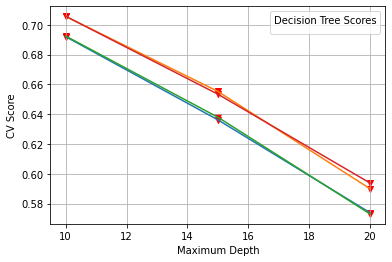

depth:  10,  score: 0.6921,  label:best__2
depth:  10,  score: 0.7057,  label:random__2
depth:  10,  score: 0.6925,  label:best__4
depth:  10,  score: 0.7058,  label:random__4
depth:  15,  score: 0.6362,  label:best__2
depth:  15,  score: 0.6553,  label:random__2
depth:  15,  score: 0.6380,  label:best__4
depth:  15,  score: 0.6535,  label:random__4
depth:  20,  score: 0.5739,  label:best__2
depth:  20,  score: 0.5900,  label:random__2
depth:  20,  score: 0.5731,  label:best__4
depth:  20,  score: 0.5938,  label:random__4


In [86]:
dt_grid = grid_search_best_params['decision_tree']
dt_summary = pd.DataFrame(dt_grid.cv_results_['params'])
dt_summary['cv_score'] = dt_grid.cv_results_['mean_test_score']

plot_x = []
plot_y = []
plot_labels = []
for md in decision_tree_params['dt__max_depth']:
    temp = dt_summary.query(f'dt__max_depth == {md}')
    plot_x.append(temp.dt__max_depth)
    plot_y.append(temp.cv_score)
    plot_labels.append(str(temp.dt__splitter) + '__' + str(temp.dt__min_samples_split))
plt.plot(plot_x, plot_y)
plt.xlabel('Maximum Depth')
plt.ylabel('CV Score')
plt.legend(title='Decision Tree Scores')
plt.scatter(x= plot_x, y=plot_y, marker='v', color='r')
plt.grid()
plt.show()

for p, s in zip(dt_grid.cv_results_['params'], dt_grid.cv_results_['mean_test_score']):
    print(f"depth: {p['dt__max_depth']:>3},  score: {s:.4f},  label:{str(p['dt__splitter']) + '__' + str(p['dt__min_samples_split'])}")

In [87]:
grid_search_best_params['decision_tree'].cv_results_

{'mean_fit_time': array([20.41745343,  7.49567957, 21.31581249, 10.32496748, 25.66846771,
        10.2167419 , 27.44688444,  9.88598294, 31.31999817, 10.99604402,
        31.57365594, 10.36426249]),
 'std_fit_time': array([1.03748877, 0.74236094, 1.75559161, 0.3415459 , 0.22316239,
        1.80017311, 1.3754615 , 1.55955321, 1.00250972, 0.97406635,
        0.42582777, 0.63929018]),
 'mean_score_time': array([0.03993549, 0.04337082, 0.04032974, 0.04156203, 0.04055262,
        0.04352903, 0.04007888, 0.04411454, 0.0399826 , 0.04505057,
        0.04143906, 0.0460083 ]),
 'std_score_time': array([0.0004882 , 0.00101965, 0.00138714, 0.00147259, 0.00056155,
        0.00090131, 0.00078772, 0.00095676, 0.00240799, 0.00050878,
        0.00166771, 0.00048516]),
 'param_dt__max_depth': masked_array(data=[10, 10, 10, 10, 15, 15, 15, 15, 20, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?

In [88]:
grid_search_best_params['decision_tree'].best_estimator_.named_steps

{'dt': DecisionTreeClassifier(max_depth=10, min_samples_split=4, splitter='random')}

In [89]:
# feature_names = list(datasets['application_train'].columns)
# feature_importance_values = np.zeros(len(feature_names))
# # divide by 5 for Kfold 5 splits
# feature_importance_values += grid_search_best_params[decision_tree_pipe].best_estimator_.named_steps["dt"].feature_importances_ / 5
# feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

print("All features", len(grid_search_best_params['decision_tree'].best_estimator_.named_steps["dt"].feature_importances_))
non_zer_features = [i for i in grid_search_best_params['decision_tree'].best_estimator_.named_steps["dt"].feature_importances_ if i !=0]
print("Non Zero features", len(non_zer_features))

All features 332
Non Zero features 208


## Feature selection

In [90]:
len(grid_search_best_params['logistic_regression'].best_estimator_.named_steps['lr'].coef_[0])

332

In [91]:
feature_importance_values = grid_search_best_params['random_forest'].best_estimator_.named_steps["rf"].feature_importances_ / 5
feature_importances = pd.DataFrame({'feature': columns_after_ohe, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False)

,feature,importance
190,EXT_SOURCE_3_power_3,0.011340
30,EXT_SOURCE_3,0.010420
29,EXT_SOURCE_2,0.010283
191,EXT_SOURCE_2_power_2,0.010086
192,EXT_SOURCE_2_power_3,0.009976
...,...,...
214,ohe__x5_Student,0.000000
307,ohe__x11_Trade: type 5,0.000000
81,FLAG_DOCUMENT_4,0.000000
12,FLAG_MOBIL,0.000000


In [92]:
zero_imp_features = feature_importances[feature_importances["importance"] == 0]['feature'].to_list()
zero_imp_features

['FLAG_MOBIL',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_15',
 'ohe__x5_Businessman',
 'ohe__x5_Student',
 'ohe__x6_Academic degree',
 'ohe__x11_Trade: type 4',
 'ohe__x11_Trade: type 5']

In [93]:
feature_importances[feature_importances["feature"].isin(new_features_column)]

,feature,importance
177,Credit/Income,0.001112
178,Annuity/Income,0.001266
179,Employed/Birth,0.001608
180,Flag_Greater_32,0.000249
181,Flag_Employment_Greater_5,0.000311
182,Flag_Income_Greater_Credit,0.000032
183,DAYS_BIRTH_power_2,0.001691
184,DAYS_BIRTH_power_3,0.001913
185,REGION_RATING_CLIENT_W_CITY_power_2,0.000408
186,REGION_RATING_CLIENT_W_CITY_power_3,0.000380


In [94]:
y = datasets[train_dataset_name]["TARGET"]
x = datasets[train_dataset_name].drop([c for c in zero_imp_features if 'ohe' not in c], axis=1)
x = x.drop('TARGET', axis=1)

In [95]:
#one hot encode the data
# extracting the cat and num features
cat_features = x.columns.values[x.dtypes.values == 'O'].tolist()
num_features = [c for c in x.columns if c not in cat_features]
# num_features.remove('TARGET')

print("No of cat features: ", len(cat_features))
print(cat_features)

print()
print("No of num features: ", len(num_features))
print(num_features)

No of cat features:  16
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

No of num features:  190
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'

In [96]:
from sklearn.compose import ColumnTransformer

# transforming the numerical features
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessing_pipe = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    n_jobs = -1,
    verbose = True,
)

In [97]:
x_train = preprocessing_pipe.fit_transform(x)

print(x_train.shape)
print(y.shape)

[ColumnTransformer] ........... (1 of 2) Processing num, total=  34.2s
(307511, 330)
(307511,)


In [98]:
lgbm_clf =LGBMClassifier(boosting_type='gbdt',learning_rate=0.1, max_depth=8, n_estimators=100, random_state= 0)
lgbm_clf.fit(x_train, y)

LGBMClassifier(max_depth=8, random_state=0)

## Kaggle Submission

In [99]:
train_columns = list(x.columns)
# train_columns.remove('TARGET')
kaggle_test = preprocessing_pipe.transform(datasets['application_test'][train_columns])
# print(len(kaggle_test[0]))
test_class_scores = lgbm_clf.predict_proba(kaggle_test)[:, 1]
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores
submit_df = submit_df.groupby('SK_ID_CURR', as_index=False).max()
submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.056596
1,100005,0.146581
2,100013,0.020274
3,100028,0.029197
4,100038,0.148530


In [100]:
submit_df.columns

Index(['SK_ID_CURR', 'TARGET'], dtype='object')

In [101]:
datasets['application_test'].shape

(48744, 211)

In [102]:
submit_df.groupby('TARGET').count()

,SK_ID_CURR
TARGET,
0.004769,1
0.005504,1
0.005697,1
0.005837,1
0.005868,1
...,...
0.690634,1
0.704252,1
0.714834,1


In [103]:
datasets[train_dataset_name][["TARGET", 'SK_ID_CURR']].groupby("TARGET").count()

,SK_ID_CURR
TARGET,
0,282686
1,24825


In [105]:
submit_df.to_csv("submission.csv",index=False)

[ColumnTransformer] ........... (2 of 2) Processing cat, total= 7.3min


## Check for data leakage

In [67]:
datasets['application_train'].shape

(307511, 212)

In [68]:
columns = datasets['application_train'].columns
columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'REGION_RATING_CLIENT_W_CITY_power_2',
       'REGION_RATING_CLIENT_W_CITY_power_3', 'REGION_RATING_CLIENT_power_2',
       'REGION_RATING_CLIENT_power_3', 'EXT_SOURCE_3_power_2',
       'EXT_SOURCE_3_power_3', 'EXT_SOURCE_2_power_2', 'EXT_SOURCE_2_power_3',
       'EXT_SOURCE_1_power_2', 'EXT_SOURCE_1_power_3'],
      dtype='object', length=212)

In [69]:

# check if any common SK_ID_CURR
new_df = datasets['application_train'].merge(datasets['application_test'], how='inner', on='SK_ID_CURR')
new_df.shape

(0, 422)

In [76]:
columns.remove('SK_ID_CURR').remove('TARGET')

In [78]:
# check if any other columns are common other than TARGET and SK_ID_CURR
columns = list(columns)
x_train_new_df = datasets['application_train'][columns]
x_test_new_df = datasets['application_test'][columns]
print(x_train_new_df.shape)
new_df = x_train_new_df.merge(x_test_new_df, how='inner', on=columns)
new_df.shape

(307511, 210)


(0, 210)

### Check if any of the categories in categorical variable is **not** in the test csv
<a href="https://towardsdatascience.com/data-leakage-in-machine-learning-how-it-can-be-detected-and-minimize-the-risk-8ef4e3a97562">Reference article</a>

In [36]:
for column in cat_features:
    train_cats = set(datasets['application_train'][column].value_counts().index)
    test_cats = set(datasets['application_test'][column].value_counts().index)
    if len(train_cats.difference(test_cats)) > 0:
        print(f"for {column} difference between train and cat is {train_cats.difference(test_cats)}")

for CODE_GENDER difference between train and cat is {'XNA'}
for NAME_INCOME_TYPE difference between train and cat is {'Maternity leave'}
for NAME_FAMILY_STATUS difference between train and cat is {'Unknown'}
[ColumnTransformer] ........... (2 of 2) Processing cat, total= 1.7min


In [42]:
print('Train: ', datasets['application_train'][datasets['application_train']['CODE_GENDER'] == 'XNA'].shape)
print('Train: ', datasets['application_test'][datasets['application_test']['CODE_GENDER'] == 'XNA'].shape)

Train:  (4, 212)
Train:  (0, 211)


In [44]:
print('Train: ', datasets['application_train'][datasets['application_train']['NAME_INCOME_TYPE'] == 'Maternity leave'].shape)
print('Train: ', datasets['application_test'][datasets['application_test']['NAME_INCOME_TYPE'] == 'Maternity leave'].shape)

Train:  (5, 212)
Train:  (0, 211)


In [45]:
print('Train: ', datasets['application_train'][datasets['application_train']['NAME_FAMILY_STATUS'] == 'Unknown'].shape)
print('Train: ', datasets['application_test'][datasets['application_test']['NAME_FAMILY_STATUS'] == 'Unknown'].shape)

Train:  (2, 212)
Train:  (0, 211)


In [49]:
datasets['application_train'].shape

(307511, 212)

## Neural network Implementation
* Parameters tuning for NN
* Activation Functions
    * ReLU <br> $ \Large Relu(z) = max(0, z) $ <br> <br>
    * LogSigmoid <br> $ \Large LogSigmoid(z) = \log(\frac{1} {1 + e^{-z}} )$ <br> <br>
    * Sigmoid <br> $ \Large \sigma(z) = \frac{1} {1 + e^{-z}} $ <br> <br>
    * CELU  <br> $ \Large CELU(x)=max(0,x)+min(0,α∗(exp(x/α)−1))$ <br> <br>
* Loss Functions
    * CrossEntropyLoss <br> 
        * In binary classification, where the number of classes $M$ equals 2, Binary Cross-Entropy(BCE) can be calculated as:
        <br> <br> $\large -{(y\log(p) + (1 - y)\log(1 - p))}$ <br> <br>
    * MSELoss <br> <br>
    $\large \sum_{i=1}^{D}(x_i-y_i)^2 $

In [39]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [41]:
import warnings
warnings.filterwarnings("ignore")

### Convert x_train and x_test data into tensor

In [45]:
y = dataset_train_lk["TARGET"]
x = dataset_train_lk.drop("TARGET", axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [46]:
x_train = preprocessing_pipe.fit_transform(x_train)
x_valid = preprocessing_pipe.transform(x_valid)
x_test = preprocessing_pipe.transform(x_test)

print(x_train.shape)
print(y_train.shape)

(150675, 332)
(150675,)


In [124]:
x_train_tensor = torch.tensor(x_train)
# convert Series to tensor
y_train_pd = pd.DataFrame(np.array(y_train))
y_train_pd.columns = ['target']
y_train_tensor = torch.tensor(y_train_pd['target'].values.reshape(-1,1))

x_valid_tensor = torch.tensor(x_valid)
x_test_tensor = torch.tensor(x_test)

In [125]:
from sklearn.metrics import roc_auc_score

def model_nn(n_input, n_hidden, batch_size, learning_rate, epoch, activation_fn, loss_fn):
    
    # build model
    model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      activation_fn,
                      nn.Linear(n_hidden, 1),
                      activation_fn)
    # define loss function
    loss_function = loss_fn
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    losses = []
    for _ in range(epoch):
        pred_y = model(x_train_tensor.float())
        loss = loss_function(pred_y.float(), y_train_tensor.float())
        losses.append(loss.item())

        model.zero_grad()
        loss.backward()

        optimizer.step()
    
    pred_y_valid = model(x_valid_tensor.float())
    pred_y_train = model(x_train_tensor.float())
    pred_y_test = model(x_test_tensor.float())
    
    roc_auc_valid = roc_auc_score(np.array(y_valid),pred_y_valid.detach().numpy())
    roc_auc_train = roc_auc_score(np.array(y_train),pred_y_train.detach().numpy())
    roc_auc_test = roc_auc_score(np.array(y_test),pred_y_test.detach().numpy())
    
    
    
    return {"Model":model,"ROC_AUC_TRAIN":roc_auc_train, "ROC_AUC_TEST":roc_auc_test, "ROC_AUC_VALID":roc_auc_valid}

In [126]:
print('x_shape:', x_train_tensor.shape, y_train_tensor.shape, len(x_train[0]))

x_shape: torch.Size([150675, 327]) torch.Size([150675, 1]) 327


In [136]:
import time
activation_fn_list = [nn.ReLU(),nn.LogSigmoid(),nn.Sigmoid(),nn.CELU()]
epoch_list = [1000]
n_hidden_list = [10,20]
n_ouput = [1]
batch_size_list = [100]
loss_fun_list = [nn.CrossEntropyLoss(),nn.MSELoss()]
learning_rate_list = [0.1,0.01]

model_params_list = []
total_params = activation_fn_list + epoch_list + n_hidden_list + batch_size_list + loss_fun_list + learning_rate_list
total_fits = len(activation_fn_list) * len(epoch_list) * len(n_hidden_list)\
                * len(batch_size_list) * len(loss_fun_list) * len(learning_rate_list)
print(f"total parameters {len(total_params)} with toatal fits {total_fits}.")
fit_count = 0
for act_fn in activation_fn_list:
    for epochs in epoch_list:
        for hidden_layers in n_hidden_list:
            for batch_size in batch_size_list:
                for loss_fn in loss_fun_list:
                    for learning_rate in learning_rate_list:
                        fit_count +=1
                        print(f"Started fit {fit_count}")
                        start = time.time()
                        params_dict = {"act_fn":act_fn,"epoch":epochs,"hidden_layers":hidden_layers,"batch_size":batch_size,
                                          "loss_fn":loss_fn,"learning_rate":learning_rate}
                        model = model_nn(len(x_train[0]), hidden_layers, batch_size, learning_rate, epochs, act_fn, loss_fn)
                        model_params_list.append({**params_dict,**model})
                        print(f"Accuracy: Train- {model['ROC_AUC_TRAIN']};\
                                Test- {model['ROC_AUC_TEST']}; Validation- {model['ROC_AUC_VALID']}")
                        print(f"Finished fit {fit_count} after {round(time.time() - start, 3)} seconds.")

total parameters 12 with toatal fits 32.
Started fit 1
Accuracy: Train- 0.5288600913274503;                                Test- 0.5227869533307413; Validation- 0.5261695804071376
Finished fit 1 after 36.939 seconds.
Started fit 2
Accuracy: Train- 0.492861723647633;                                Test- 0.49534939906120196; Validation- 0.4899778578464404
Finished fit 2 after 36.898 seconds.
Started fit 3
Accuracy: Train- 0.7531721826371496;                                Test- 0.7446965267114256; Validation- 0.7395452596929712
Finished fit 3 after 36.13 seconds.
Started fit 4
Accuracy: Train- 0.7037569457559139;                                Test- 0.7038542039400231; Validation- 0.6980704027511015
Finished fit 4 after 36.087 seconds.
Started fit 5
Accuracy: Train- 0.5060832854914227;                                Test- 0.5011207808317645; Validation- 0.503779915327854
Finished fit 5 after 41.188 seconds.
Started fit 6
Accuracy: Train- 0.5618471983727187;                               

In [139]:
nn_experiment_log = pd.DataFrame.from_records(model_params_list)
nn_experiment_log.sort_values(by='ROC_AUC_VALID', ascending=False)

,act_fn,epoch,hidden_layers,batch_size,loss_fn,learning_rate,Model,ROC_AUC_TRAIN,ROC_AUC_TEST,ROC_AUC_VALID
26,CELU(alpha=1.0),1000,10,100,MSELoss(),0.10,"[Linear(in_features=327, out_features=10, bias...",0.758773,0.753406,0.747729
30,CELU(alpha=1.0),1000,20,100,MSELoss(),0.10,"[Linear(in_features=327, out_features=20, bias...",0.758366,0.752126,0.747559
2,ReLU(),1000,10,100,MSELoss(),0.10,"[Linear(in_features=327, out_features=10, bias...",0.753172,0.744697,0.739545
6,ReLU(),1000,20,100,MSELoss(),0.10,"[Linear(in_features=327, out_features=20, bias...",0.753764,0.745593,0.735856
31,CELU(alpha=1.0),1000,20,100,MSELoss(),0.01,"[Linear(in_features=327, out_features=20, bias...",0.737027,0.735019,0.729359
27,CELU(alpha=1.0),1000,10,100,MSELoss(),0.01,"[Linear(in_features=327, out_features=10, bias...",0.737097,0.733433,0.729082
18,Sigmoid(),1000,10,100,MSELoss(),0.10,"[Linear(in_features=327, out_features=10, bias...",0.721396,0.725235,0.712639
22,Sigmoid(),1000,20,100,MSELoss(),0.10,"[Linear(in_features=327, out_features=20, bias...",0.717058,0.719671,0.707915
3,ReLU(),1000,10,100,MSELoss(),0.01,"[Linear(in_features=327, out_features=10, bias...",0.703757,0.703854,0.698070
7,ReLU(),1000,20,100,MSELoss(),0.01,"[Linear(in_features=327, out_features=20, bias...",0.696450,0.698363,0.687185


In [142]:
for model_inf in model_params_list:
    if  model_inf['ROC_AUC_VALID'] > 0.747729:
        print('Best Model: ', model_inf)
        break

Best Model:  {'act_fn': CELU(alpha=1.0), 'epoch': 1000, 'hidden_layers': 10, 'batch_size': 100, 'loss_fn': MSELoss(), 'learning_rate': 0.1, 'Model': Sequential(
  (0): Linear(in_features=327, out_features=10, bias=True)
  (1): CELU(alpha=1.0)
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): CELU(alpha=1.0)
), 'ROC_AUC_TRAIN': 0.7587732830029508, 'ROC_AUC_TEST': 0.7534061056918387, 'ROC_AUC_VALID': 0.7477290429765071}


## Train best NN model

In [44]:
y = dataset_train_lk["TARGET"]
zero_imp_features = ['FLAG_MOBIL','FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_15',
 'ohe__x5_Businessman',
 'ohe__x5_Student',
 'ohe__x6_Academic degree',
 'ohe__x11_Trade: type 4',
 'ohe__x11_Trade: type 5']
x = dataset_train_lk.drop([c for c in zero_imp_features if 'ohe' not in c], axis=1)
x = x.drop('TARGET', axis=1)
x_train = preprocessing_pipe.fit_transform(x)
# x_train_columns = x.columns
x_train_tensor = torch.tensor(x_train)
# convert Series to tensor
y_train_pd = pd.DataFrame(np.array(y))
y_train_pd.columns = ['target']
y_train_tensor = torch.tensor(y_train_pd['target'].values.reshape(-1,1))

print(x_train.shape)
print(y.shape)

(307500, 332)
(307500,)


In [47]:
## add ngrok to check tensorboard on from kaggle machine to our browser
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ./ngrok-stable-linux-amd64.zip

--2022-12-13 03:48:31--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  5.98MB/s    in 2.2s    

2022-12-13 03:48:35 (5.98 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ./ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [50]:
!./ngrok authtoken {{token}}

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [51]:
# start tensorboard and crate ngrok server to access in the browser
import os
import multiprocessing
 
pool = multiprocessing.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir ./runs/ --host 0.0.0.0 --port 6006 &",
                        "./ngrok http 6006 &"
                        ]]

In [53]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'])"

[{'name': 'command_line', 'uri': '/api/tunnels/command_line', 'public_url': 'https://5951-35-185-150-80.ngrok.io', 'proto': 'https', 'config': {'addr': 'http://localhost:6006', 'inspect': True}, 'metrics': {'conns': {'count': 0, 'gauge': 0, 'rate1': 0, 'rate5': 0, 'rate15': 0, 'p50': 0, 'p90': 0, 'p95': 0, 'p99': 0}, 'http': {'count': 0, 'rate1': 0, 'rate5': 0, 'rate15': 0, 'p50': 0, 'p90': 0, 'p95': 0, 'p99': 0}}}, {'name': 'command_line (http)', 'uri': '/api/tunnels/command_line%20%28http%29', 'public_url': 'http://5951-35-185-150-80.ngrok.io', 'proto': 'http', 'config': {'addr': 'http://localhost:6006', 'inspect': True}, 'metrics': {'conns': {'count': 0, 'gauge': 0, 'rate1': 0, 'rate5': 0, 'rate15': 0, 'p50': 0, 'p90': 0, 'p95': 0, 'p99': 0}, 'http': {'count': 0, 'rate1': 0, 'rate5': 0, 'rate15': 0, 'p50': 0, 'p90': 0, 'p95': 0, 'p99': 0}}}]


In [46]:
from torch.utils.tensorboard import SummaryWriter

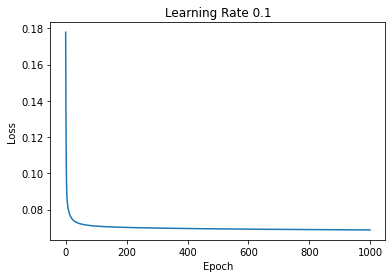

In [55]:
model = nn.Sequential(nn.Linear(len(x_train[0]), 10),
                      nn.CELU(alpha=1.0),
                      nn.Linear(10, 1),
                      nn.CELU(alpha=1.0))
# define loss function
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

losses = []
tb = SummaryWriter()
for ep in range(1000):
    pred_y = model(x_train_tensor.float())
    loss = loss_function(pred_y.float(), y_train_tensor.float())
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    tb.add_scalar("Loss", loss, ep)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Learning Rate 0.1")
plt.plot(losses)

In [57]:
tb.close()

## Kaggle submission using Nueral network

In [171]:
x_test = datasets['application_test'][x.columns]
x_test = preprocessing_pipe.fit_transform(x_test)
len(x_test[0])

327

In [175]:
x_test_tensor = torch.tensor(x_test)
pred_y_test = model(x_test_tensor.float()).flatten().clip(0,1)

In [179]:
sub = pd.DataFrame()
sub['SK_ID_CURR'] = datasets['application_test']['SK_ID_CURR']
sub['TARGET'] = pred_y_test.detach().numpy()
sub[['SK_ID_CURR', 'TARGET']].to_csv('sub_nn.csv', index= False)
print(sub.head())

   SK_ID_CURR    TARGET
0      100001  0.052366
1      100005  0.168234
2      100013  0.011611
3      100028  0.041497
4      100038  0.153913


In [181]:
print(datasets['application_test'].shape)
sub.shape

(48744, 211)


(48744, 2)

# Report and Results:
<p>
<strong>Abstract:</strong>
</p>
<p>
The main aim of this project is to tackle the burden of financial instability
and make the job of loan lending organizations easier and fairer. To achieve
this, our main task in this phase will be building a neural network pipeline and
experimenting with different architectures of it; check if there is any leakage
in the pipelines; and find out if we are violating any cardinal sins. We used
the PyTorch framework to build a neural network and experimented with different
training parameters such as activation functions, iterations, hidden layers, and
learning rate. Also, we observed the leakage in the dataset by finding the
difference between the categorical features of the training and test datasets.
We attempted to balance the dataset where the output (Target=1/0) is equal,
however, the accuracy remained the same. We performed hyperparameter tuning for
our models, and experimented with different parameters of XGBoost with a total
of 240 experiments, LGBM with a total of 180 experiments, and a neural network
with a total of 32 experiments. When compared with the previous phase, our
accuracy for XGBoost remained the same  with 91.96% for the validation dataset,
but the LGBM showed a slight improvement of 1%. For neural networks, the public
score obtained for the Kaggle submission is 74.6%. The main challenge in this
phase we faced was the data imbalance, the hyperparameter tuning for the neural
network model to increase the accuracy and the time needed to train the model.
</p>
<h2>Phase Leadership Plan</h2>
<p>
<img src="https://i.imgur.com/NT6zHcE.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h2>Credit Assignment Plan</h2>
<h3>Phase 4</h3>
<p>
<img src="https://i.imgur.com/ZjMJVjk.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h3>Phase 3</h3>
<p>
<img src="https://i.imgur.com/bdFX0Dl.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h3>Phase 2</h3>
<p>
<img src="https://i.imgur.com/LeBISbp.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h3>Phase 1</h3>
<p>
<img src="https://i.imgur.com/kST91hf.jpg" width="" alt="alt_text" title="image_tooltip">
</p>
<h2>Flow Chart of Phase 4:</h2>
<img src="https://i.imgur.com/AKPWHTH.png" width="" alt="alt_text" title="image_tooltip">
<h2>HCDR Data Description</h2>
<p>
The given HCDR dataset consists of the following CSV files; which have the
information of all the tables and also about all the columns present in them.
These are as follows:
</p>
<p>
<strong>     1.<span style="text-decoration:underline;">
HomeCredit_columns_description.csv: </span></strong>
</p>
<p>
This CSV file consists of the information of all the available columns along
with all the available in the dataset.  There are five columns named Table, Row,
Description and Special. The column named “Table” consists of the name of the
CSV file. The column named “Row” consists of the names of all the columns which
are present in each CSV file. Each row contains the name of a particular column.
The column named “Description” consists of the description of the particular
column.
</p>
<p>
    <strong>2. <span
style="text-decoration:underline;">POS_Cash_balance.csv:</span></strong>
</p>
<p>
This file consists of Monthly balance snapshots of previous POS (point of sales)
and cash loans that the applicant had with Home Credit.  This table has one row
for each month of history of every previous credit in Home Credit (consumer
credit and cash loans) related to loans in our sample – i.e. the table has
(loans in sample of relative previous credits of months in which we have some
history observable for the previous credits) rows.
</p>
<p>
    <strong>3</strong>. <strong><span
style="text-decoration:underline;">Application_Train.csv</span></strong>:
</p>
<p>
This file consists of the training data. It has a total of 122 columns present
in it. This data will be used for applying the model.
</p>
<p>
<strong>   4.  <span style="text-decoration:underline;">Application_Test.csv:
</span></strong>
</p>
<p>
This file consists of the testing data. It has a total of 121 columns present in
it. This data will be used for testing the trained model.
</p>
<p>
<strong>   5. <span style="text-decoration:underline;">Bureau.csv:
</span></strong>
</p>
<p>
All client's previous credits provided by other financial institutions were
reported to the Credit Bureau (for clients who have a loan in our sample).  The
number of rows are equal to the number of credits the client had in the Credit
Bureau before the application date.
</p>
<p>
   <strong>6</strong>. <strong><span
style="text-decoration:underline;">Bureau_Balance.csv:  </span></strong>
</p>
<p>
Monthly balances of previous credits in Credit Bureau.This table has one row for
each month of history of every previous credit reported to Credit Bureau – i.e
the table has (loans in sample of relative previous credits of months where we
have some history observable for the previous credits) rows.
</p>
<p>
  <strong>7</strong>. <strong><span
style="text-decoration:underline;">Credit_Card_Balance.csv:</span></strong>
</p>
<p>
This file consists of the balance information of all the previous credit cards
that the applicant has with Home Credit. This table has each row consisting of
the history of previous credits for each month.
</p>
<p>
 <strong><span style="text-decoration:underline;">8.
Previous_Application.csv:</span></strong>
</p>
<p>
This table consists of all the applications which have Home Credit loans. The
table consists of one row for each previous application of the client.
</p>
<p>
<strong><span style="text-decoration:underline;">9.
Installments_payments.csv:</span></strong>
</p>
<p>
This table has the information of the previously disbursed credits in Home
Credit related to the loans. Each row has two pieces of information i.e. a row
for every payment that was made and also a row for each of the payments that was
missed.
</p>
<p>
All the above mentioned are connected. The connection of these columns is as
shown in the figure below.
</p>
<p>
<img src="https://i.imgur.com/NeW9Jgi.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h3> <strong>The metrics of the data are as follows</strong></h3>
<p>
<img src="https://i.imgur.com/tVTCz19.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
<img src="https://i.imgur.com/pV4c6qE.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
<img src="https://i.imgur.com/RcOgeKL.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
<img src="https://i.imgur.com/PzZ4CiR.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
<img src="https://i.imgur.com/1EWnSEK.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
<img src="https://i.imgur.com/J1ib7Hs.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h2>EDA Steps</h2>
<ol>
<li>
<img src="https://i.imgur.com/ki5YORd.png" width="" alt="alt_text" title="image_tooltip">
</li>
</ol>
<h2>Modeling Pipelines</h2>
<h3>A visualization of the modeling pipeline</h3>
<p>
<img src="https://i.imgur.com/6NVLatc.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h3>Number of experiments conducted</h3>
<p>
	We have done the following experiments and chosen the best parameters for the
below mentioned models
</p>
<ol>
<li>Logistic Regression : 5 cross validation folds X 9 candidate parameters + 1
experiment to choose the best model = 46 experiments
<li>Decision Tree : 5 cross validation folds X 12 candidates parameters + 1
experiment to choose the best model = 61 experiments
<li>XGBoost =  5 cross validation folds X 80 candidates parameters + 1
experiment to choose the best model = 241 experiments
<li>LGBM =  5 cross validation folds X 37 candidates parameters + 1 experiment
to choose the best model = 181 experiments
<li>Random forest =  5 cross validation folds X 4 candidate parameter + 1
experiment to choose the best model = 21 experiments
<li>Neural network = 32 candidate parameters + 1 experiment to choose the best
model = 33 experiments
</li>
</ol>
<p>
<strong>Total number of experiments conducted = 46 + 61 + 241 + 181 + 21 + 33 =
583 experiments</strong>
</p>
<h2>Experiment table with the following details per experiment</h2>
<h3>Baseline experiment</h3>
<ol>
<li><strong>Logistic Regression:</strong>
<p>
    The parameters used for logistic regression are as follows :
</p>
<ul>
<li><strong>C<em>: </em></strong>Inverse of regularization strength; must be a
positive float. Smaller values specify stronger regularization.
<li><strong>Penalty: </strong>The type of penalty applied: Ridge, Lasso or
elasticnet
</li>
</ul>
</li>
</ol>
<p>
		We have used the following parameters in our experiment :
</p>
<ul>
<li>'lr__C' : [10, 100],
<li> 'lr__penalty' :  ['l1', 'l2', 'elasticnet']
<li><strong>Decision Tree:</strong>
<p>
        The parameters used for decision tree are as follows:
</p>
<ul>
<li><strong>max_depth<em> :</em></strong>The maximum depth of the tree. If None,
then nodes are expanded until all leaves are pure or until all leaves contain
less than min_samples_split samples.
</li>
</ul>
</li>
</ul>
<p>
		We have used the following parameters in our experiment :
</p>
<ul>
<li>'dt__max_depth' : [10, 15, 20]
</li>
</ul>
<h4>The families of input features used</h4>
<p>
	We have used the numerical and categorical features to train the model.
</p>
<h2>Train/valid/test record Accuracy using ROC AUC as follow</h2>
<h3>ML models accuracy</h3>
<p>
<img src="https://i.imgur.com/g0WA2cW.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
    The LGBM Classifier is chosen as the best model as the test accuracy
observed is 91.89 which is the highest of all the models trained.
</p>
<h3>Neural networks results using ROC AUC for different parameters</h3>
<p>
<img src="https://i.imgur.com/jC2oADm.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h2>Feature Engineering</h2>
<h3>New features</h3>
<p>
We have added new features to our dataset from the existing features from
application_train.csv
</p>
<ol>
<li>NEW_CAR_TO_BIRTH_GAP = DAYS_BIRTH - OWN_CAR_AGE
</li>
</ol>
<p>
This feature calculates the difference between the columns days birth and
own_car age
</p>
<ol>
<li>NEW_EMPLOY_TO_BIRTH_GAP = DAYS_BIRTH - DAYS_EMPLOYED
</li>
</ol>
<p>
This feature calculates the difference between the columns days birth and days
employed
</p>
<ol>
<li>YEARS_BIRTH = DAYS_BIRTH / 365.25
</li>
</ol>
<p>
Here, the birth year is calculated by dividing the days birth column by 365.25
</p>
<ol>
<li>Credit/Income = AMT_CREDIT /  AMT_INCOME_TOTAL
</li>
</ol>
<p>
This feature calculated by dividing amount credited by total amount of income
</p>
<ol>
<li>Annuity/Income = AMT_ANNUITY / AMT_INCOME_TOTAL
</li>
</ol>
<p>
This feature is calculated by dividing the annuity column by total amount of
income
</p>
<ol>
<li>Employed/Birth = DAYS_EMPLOYED / DAYS_BIRTH
</li>
</ol>
<p>
This feature calculates the percentage of days employed by dividing the
days_employed column b days_birth
</p>
<ol>
<li>Flag_Greater_32 = YEARS_BIRTH > 32 or not
</li>
</ol>
<p>
This feature returns the value 1 if the year of birth is greater than 32 else
returns 0
</p>
<ol>
<li>Flag_Employment_Greater_5 = DAYS_EMPLOYED / -365.25 is greater than 5 or not
</li>
</ol>
<p>
This feature checks whether the total years of employment is greater than 5 or
not. If the total employment year is greater than 5, then it returns 1 else
returns 0
</p>
<ol>
<li>Flag_Income_Greater_Credit = AMT_INCOME_TOTAL > AMT_CREDIT
</li>
</ol>
<p>
This feature compares the values between the two columns total amount of income
and total amount of credit(loan taken by the customer)
</p>
<ol>
<li>previous_loan_counts = count(SK_ID_BUREAU) in previous applications.csv
</li>
</ol>
<p>
This feature counts the applications that the user has done before their loan
was approved.
</p>
<ol>
<li>Polynomial Features: Here we have created polynomial features for columns
having top positive and negative correlations where we added new features
(columns) where values were calculated by squaring the values in X, e.g. X^2. or
X^3
</li>
</ol>
<ol>
<li>EXT_SOURCE_3_power_2
<li>EXT_SOURCE_2_power_2
<li>EXT_SOURCE_3_power_3
<li>EXT_SOURCE_2_power_3
<li>EXT_SOURCE_1_power_2
<li>EXT_SOURCE_1_power_3
<li>DAYS_BIRTH_power_2
<li>Flag_Greater_32
<li>Flag_Employment_Greater_5
<li>Flag_Income_Greater_Credit
<li>Credit/Income
<li>Annuity/Income
<li>Employed/Birth
<li>REGION_RATING_CLIENT_power_3
<li>REGION_RATING_CLIENT_power_2
<li>REGION_RATING_CLIENT_W_CITY_power_3
<li>REGION_RATING_CLIENT_W_CITY_power_2
<li>DAYS_BIRTH_power_3
<li>PREVIOUS_APPLICATIONS_COUNT
</li>
</ol>
<h3>Correlation of new features with target variable</h3>
<ol>
<li><strong>New features correlation with TARGET</strong>
</li>
</ol>
<p>
<img src="https://i.imgur.com/Yfiwqom.png" width="" alt="alt_text" title="image_tooltip">
</p>
<ol>
<li><strong>New features correlation with TARGET</strong>
</li>
</ol>
<p>
<img src="https://i.imgur.com/TrBglQj.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
<strong>	</strong>
</p>
<h3>Data leakage</h3>
<p>
Data leakage is when information from outside the training dataset is used to
create the model. This additional information can allow the model to learn or
know something that it otherwise would not know and in turn invalidate the
estimated performance of the mode being constructed.
</p>
<p>
To check the data leakage, following steps are followed:
</p>
<ol>
<li>Check if any ‘SK_ID_CURR’ is common between test and train data.
</li>
</ol>
<p>
<img src="https://i.imgur.com/TrBglQj.png" width="" alt="alt_text" title="image_tooltip">
</p>
<ol>
<li>Check any data points are same between test and train(excluding
‘SK_ID_CURR’)
</li>
</ol>
<p>
<p style="text-align: right">
<img src="https://i.imgur.com/juWpdln.png" width="" alt="alt_text" title="image_tooltip">
</p>
</p>
<ol>
<li>See if any categorical values are not in test data those are considered in
the train data as we are creating dummy features using One Hot Encoding.
<p>
<img src="https://i.imgur.com/GIoRM2v.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
        3 columns has 1 each categorical value in extra in the training dataset
as shown above.
</p>
</li>
</ol>
<h2>Hyperparameter Tuning</h2>
<h3>Hyperparameter tuning techniques</h3>
<ol>
<li><strong>GridSearchCV </strong>- GridSearchCV is used for finding the best
parameter values from a given set of parameters for a model in a grid and
extracts the best parameter values to find the predictions.
</li>
</ol>
<p>
            Here are the screenshots of the best parameters we got for each
model after hyperparameter tuning is given below:
</p>
<p>
<img src="https://i.imgur.com/7HhSkgy.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
</p>
<p>
<strong>Hyperparameter Tuning for Decision Tree Classifier model:</strong> Here
we have plotted a graph for CV score versus maximum depth
</p>
<p>
<img src="https://i.imgur.com/1NpIGtk.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
The best parameter for Decision Tree Classifier is
</p>
<p>
{ max_depth = 10 and splitter = ’Random’ }
</p>
<p>
<em>As compared to the baseline model, we observed an decrease in accuracy after
increasing the max depth because the splitter parameter was added.</em>
</p>
<ol>
<li><strong>ROC / AUC  </strong>- We are experimenting with different model
parameters and using <strong><em>roc_auc</em></strong> to calculate accuracy
<p>
    Model Parameters used for the model are:
</p>
<p>
    <strong>1) Logistic Regression:</strong>
</p>
<p>
    <strong>Accuracy</strong>:
</p>
<p>
    Train Accuracy = 91.95%
</p>
<p>
        Validation Accuracy = 91.96%
</p>
<p>
        Test Accuracy = 91.84%
</p>
</li>
</ol>
<p>
	<strong>Best Logistic Parameters : </strong>
</p>
<p>
    logit_params = {'lr__C' : 1,
</p>
<p>
              'lr__penalty' : ‘l1’
</p>
<p>
             }
</p>
<p>
    <strong>2) Decision Tree:</strong>
</p>
<p>
    <strong>Accuracy</strong>:
</p>
<p>
    Train Accuracy = 92.38%
</p>
<p>
        Validation Accuracy = 91.67%
</p>
<p>
        Test Accuracy = 91.58%
</p>
<p>
	<strong>Best Decision Tree Parameters : </strong>
</p>
<p>
    decision_tree_params = {
</p>
<p>
        'dt__max_depth' : 10,
</p>
<p>
        'dt__splitter': ["random"],
</p>
<p>
        'dt__min_samples_split': [2] }
</p>
<p>
    <strong>3) Random Forest:</strong>
</p>
<p>
    <strong>Accuracy</strong>:
</p>
<p>
    Train Accuracy = 91.98%
</p>
<p>
        Validation Accuracy = 91.97%
</p>
<p>
        Test Accuracy = 91.84%
</p>
<p>
</p>
<p>
    <strong>Best Random Forest Parameters : </strong>
</p>
<p>
    random_forest_param = {
</p>
<p>
        'rf__max_depth' : [10],
</p>
<p>
        'rf__n_estimators' : [100],
</p>
<p>
        'rf__criterion' : ['gini']
</p>
<p>
    }
</p>
<p>
    <strong>4) XGBoost</strong>
</p>
<p>
    <strong>Accuracy</strong>:
</p>
<p>
    Train Accuracy = 91.99%
</p>
<p>
        Validation Accuracy = 91.98%
</p>
<p>
        Test Accuracy = 91.86%
</p>
<p>
    <strong>Best XGBoost Parameters : </strong>
</p>
<p>
    xgboost_params = {
</p>
<p>
        'xgb__min_child_weight': [19.0],
</p>
<p>
        'xgb__objective': ['binary:logistic'],
</p>
<p>
        'xgb__max_depth': [7],
</p>
<p>
        'xgb__eta': [0.025],
</p>
<p>
        'xgb__eval_metric': ['auc'],
</p>
<p>
        'xgb__max_delta_step': [1.8],
</p>
<p>
        'xgb__colsample_bytree':[0.4],
</p>
<p>
        'xgb__subsample': [0.8],
</p>
<p>
        'xgb__gamma': [0.65] }
</p>
<p>
    Screenshot of XGBoost best parameters after gridsearch:
</p>
<p>
<img src="https://i.imgur.com/VXSziFA.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
    <strong>5) LGBM Classifier</strong>
</p>
<p>
    <strong>Accuracy</strong>:
</p>
<p>
    Train Accuracy = 92.28%
</p>
<p>
        Validation Accuracy = 92.00%
</p>
<p>
        Test Accuracy = 91.89%
</p>
<p>
    <strong>Best LGBM Parameters : </strong>
</p>
<p>
    lightgbm_params={
</p>
<p>
        'LGBMClassifier__boosting_type':['gbdt''],
</p>
<p>
        'LGBMClassifier__max_depth':[-1],
</p>
<p>
        'LGBMClassifier__n_estimators':[100]
</p>
<p>
    }
</p>
<p>
    From above all the model parameters, we have found the best parameters for
each training model
</p>
<p>
    Here, below is the accuracy screenshot for all the models which are trained:
</p>
<p>
<img src="https://i.imgur.com/MsGoDkW.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
	<strong>6) Neural network</strong>
</p>
<p>
	<strong>Accuracy</strong>:
</p>
<p>
    Train Accuracy = 75.6%
</p>
<p>
        Validation Accuracy = 74.7%
</p>
<p>
        Test Accuracy = 75.3%
</p>
<p>
    <strong>Best LGBM Parameters : </strong>
</p>
<p>
    Activation function: CELU
</p>
<p>
    Epoch: 1000
</p>
<p>
    Hidden_layers: 10
</p>
<p>
    Batch_size: 100
</p>
<p>
    Loss function: MSELoss
</p>
<p>
    Below are the experiments conducted for neural network:
</p>
<img src="https://i.imgur.com/RTRXwUQ.png" width="" alt="alt_text" title="image_tooltip">
<p>
    We used tesnsorboard to continuosly observe the neural network training. Below is the example of the loss for each epoch while training in the tensorboard.
</p>
<img src='https://i.imgur.com/nQnGdxI.jpg' width="" alt="alt_text" title="image_tooltip">
<br>
<br>
<h3>Impact of newly added features on the model</h3>
<p>
Here we have calculated the correlation of all the newly added features to find
the importance of each feature that will affect the model accuracy
</p>
<p>
<img src="https://i.imgur.com/2GaPVfa.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
We can observe that polynomial features impact the most as input variables to a
power can help to better expose the important relationships between input
variables and the target variable. Also, features like EXT_SOURCE_3_power_2 ,
EXT_SOURCE_2_power_2, EXT_SOURCE_2_power_3 have more impact on the trained
model.
</p>
<h2>Feature Selection</h2>
<p>
We have included all the features except the ones which have correlation values
as 0 which are less important because the classification result does not affect
when these features are included in the dataset while training the model.
</p>
<p>
Zero importance features as below:
</p>
<ul>
<li>FLAG_MOBIL
<li> FLAG_DOCUMENT_4
<li> FLAG_DOCUMENT_7
<li> FLAG_DOCUMENT_10
<li> FLAG_DOCUMENT_12
<li> FLAG_DOCUMENT_13
<li> FLAG_DOCUMENT_21
</li>
</ul>
<p>
Comparing the results using the above techniques and selecting the best model
from them.
</p>
<h2>Results</h2>
<ul>
<li>After performing a baseline submission, we were getting an accuracy of 56%
on our Kaggle submission.
<li>We performed feature engineering manually, and added <strong>19 new
features</strong> and found out their correlation with the TARGET variable.
<li>Also, One Hot Encoding was performed, on the categorical features and ended
up with <strong>139 new features.</strong>
<li>By performing feature selection using Random Forest algorithm, <strong>we
removed 11 feature columns that had 0 importance.  </strong>
</li>
</ul>
<ul>
<li><span style="text-decoration:underline;">Model Observations and
Results<strong>: </strong></span>
<p>
    As compared to the baseline model, we observed an decrease in accuracy after
increasing the max depth because the splitter parameter was added.
</p>
</li>
</ul>
<ul>
<li>Here is the screenshot of the experiment log which shows the roc_auc
accuracies before feature engineering for Logistic Regression, Decision Tree and
Random Forest classifier models:
</li>
</ul>
<p>
<img src="https://i.imgur.com/AM80bYL.png" width="" alt="alt_text" title="image_tooltip">
</p>
<p>
<img src="https://i.imgur.com/mX5Z1Mk.png" width="" alt="alt_text" title="image_tooltip">
</p>
<ul>
<li>After performing feature engineering, hyperparameter tuning and adding new
models i.e XGBoost and LGBM, the screenshot of our experiment log is given
below.
</li>
</ul>
<p>
<img src="https://i.imgur.com/GGj6Wwo.png" width="" alt="alt_text" title="image_tooltip">
</p>
<ul>
<li>Data leakage analysis found 3 categorical features which are not in the test
data. However, after removing the identified categorical variables model
accuracy had no effect(as seen in the kaggle submission below).
<li>Now common data points were found between test and train datasets.
</li>
</ul>
<p>
The highest training test and validation accuracy was obtained on the<strong>
LGBM (Light Gradient Boost Model) which was 92.28, 92.00, 91.86 for train
validation and test model </strong>and hence we chose the same to perform our
<strong>Kaggle submission which gave us an amazing result of 76.6% <em>(slight
improvement from phase 3). </em></strong>We also submitted the prediction of the
neural network and got an accuracy of <strong>74.6% on Kaggle</strong>. Here is
the screenshot of the latest submission for your reference.
</p>
<p>
<img src="https://i.imgur.com/kThoNoZ.png" width="" alt="alt_text" title="image_tooltip">
</p>
<h2>Conclusion</h2>
<p>
    The ability to repay loans is essential in today's world. We created a machine
learning model to predict whether or not the loan borrower will be able to repay
the loan in order to solve this problem. For this, we conducted multiple
experiments to select the best possible parameters for machine learning and
neural network models. To select the best model, we performed data cleaning and
Exploratory Data Analysis on original data as well as on new features by
performing manual feature engineering and using polynomial features. We also
ensured that there was no data leakage in the train dataset. Then we performed
experiments using multiple models and found that the Light gradient boost
model(LGBM) gave the best accuracy of 92% when we splitted the train data into
train, test and validation sets. After doing the Kaggle Submission, we achieved
a 76% public score. We also trained a neural network model which gave us a
Kaggle public score of 74%. The LGBM is clearly outperforming the neural
network. In future, we will try to streamline the process and experiment with
new machine learning models and different neural network architecture to make an
attempt to increase accuracy on the dataset. By doing this, we will improvise a
loan-lending process that will empower the client to predict the defaulter more
accurately.
</p>

## Cardinal Sins of ML we look out for
* Blindly increasing the number of epochs when the model is not converging
* Not shuffling the training dataset
* In multiclass classification, not prioritizing specific per-class metrics accuracy
* Assuming specificity will lead to lower model accuracy
* Ignoring prediction bias

# References
<ol>
    <li>
        <p> &nbsp;<a href="https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook">Kaggle Introduction</a></p>
    </li>
    <li>
        <p> &nbsp;<a href="https://pandas.pydata.org/">Pandas</a></p>
    </li>
    <li>
        <p> &nbsp;<a href="https://scikit-learn.org/stable/index.html">Sklearn</a></p>
    </li>
    <li>
        <p> &nbsp;<a href="https://en.wikipedia.org/wiki/Logistic_regression"> Logistic Regression</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://seaborn.pydata.org">Seaborn</a>&nbsp;</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://en.wikipedia.org/wiki/Decision_tree">Decision Tree</a>&nbsp;</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://en.wikipedia.org/wiki/Normal_distribution">Normal Distribution</a>&nbsp;</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://www.kaggle.com/competitions/home-credit-default-risk">Kaggle</a>&nbsp;</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://dergipark.org.tr/en/pub/jader/issue/49634/555979">Correlation Analysis</a></p>
    </li>
    <li>
        <p> &nbsp;<a href="https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5?gi=f2d6c64870f2">AUC/ROC</a>&nbsp;</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://xgboost.readthedocs.io/en/stable/python/python_api.html">XGBoost Model</a>&nbsp;</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://www.scirp.org/journal/paperinformation.aspx?paperid=65359">Random Forest</a>&nbsp;</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://lightgbm.readthedocs.io/en/v3.3.2/">LGBM</a>&nbsp;</p>
    </li>
    <li>
        <p> &nbsp;<a href="https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/">Polynomial features</a> </p>
    </li>
    <li>
        <p> &nbsp;<a href="https://towardsdatascience.com/google-continuously-differentiable-exponential-linear-units-with-interactive-code-manual-back-fcbe7f84e79">CELU Loss Function</a> </p>
    </li>
    <li>
        <p> &nbsp;<a href="https://drive.google.com/file/d/1Od9rgGkOaqLUJSrGKREPz3n5-R3gLuj6/view?usp=sharing">Neural Networks</a> </p>
    </li>
   </ol>